<a href="https://colab.research.google.com/github/HowardHNguyen/ML_DL_Time_Series_by_Python/blob/main/Influenza_like_Illness_Forecasting_ARIMA_SARIMA_FBProphet_Neural_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJECT DESCRIPTION

**Description:**

The California Department of Public Health (CDPH) Influenza Surveillance Program (CISP) is a collaborative effort between CDPH, the Centers for Disease Control and Prevention (CDC), Kaiser Permanente, California local health jurisdictions and the participating California sentinel providers and sentinel laboratories. Influenza surveillance in California is particularly important due to its coastal location with several ports of entry for flights and shipping from Asia. Annual influenza epidemics follow a winter seasonal pattern in the United States with typical activity peaking during late December to early February. CDPH obtains and analyzes clinical, and laboratory data year-round in an effort to determine the timing and impact of influenza activity and to determine how well circulating strains of the virus match those used in the current influenza vaccines.

Influenza surveillance season: Influenza surveillance seasons run from Week 40 through Week 39.
Values include:
2001-2002, 2002-2003, 2003-2004, 2004-2005, 2005-2006, 2006-2007, 2007-2008, 2008-2009, 2009-2010, 2010-2011, 2011-2012, 2012-2013, 2013-2014, 2014-2015, 2015-2016, 2016-2017, 2017-2018, 2018-2019, 2019-2020.

Weekending: Date of the last day included in the CDC MMWR Week (Saturday). Format MM/DD/YYYY.

**Regions**

Values:

**Bay Area:**  Includes Alameda, Contra Costa, Marin, Napa, San Francisco, San Mateo, Santa Clara, Santa Cruz, Solano, and Sonoma counties
California: All California counties

**Central:** Includes Calaveras, Fresno, Inyo, Kings, Madera, Mariposa, Merced, Mono, Monterey, San Benito, San Joaquin, Stanislaus, Tulare, and Tuolumne counties

**Lower Southern:** Includes Imperial, Orange, Riverside, San Bernardino, and San Diego counties

**Northern:** Includes Alpine, Amador, Butte, Colusa, Del Norte, El Dorado, Glenn, Humboldt, Lake, Lassen, Mendocino, Modoc, Nevada, Placer, Plumas, Sacramento, Shasta, Sierra, Siskiyou, Sutter, Tehama, Trinity, Yolo, and Yuba counties

**Upper Southern:** Includes Kern, Los Angeles, San Luis Obispo, Santa Barbara, and Ventura counties

Note: Not all counties in region have outpatient ILI data providers. View the [California Regional Map](https://cceanet.org/about-us/regions/).

**Columns Details:**

**Season**:
Influenza surveillance season: Influenza surveillance seasons run from Week 40 through Week 39. (text)

**Weekending**:
Date of the last day included in the CDC MMWR Week (Saturday). Format MM/DD/YYYY. (number)

**Total_ILI**:
Number of outpatient visits for influenza-like illness (ILI). (number)

**Total_Patients_Seen**:
Total patients seen for any reason. (number)

**Percent_ILI**:
Percentage of patients that were due to influenza-like illness. (number)

**Number_Providers_Reporting**:
Number of providers reporting data during given week and region. (number)

# LOAD AND EXPLORATION DATA

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/data/flu-ili-byregion-fluseason_data.csv')

# Convert weekending to datetime format
df['weekending'] = pd.to_datetime(df['weekending'])

# Set the index to weekending
df.set_index('weekending', inplace=True)

# Filter data for each region
regions = df['region'].unique()
region_data = {region: df[df['region'] == region]['Total_ILI'] for region in regions}

<ipython-input-3-e54fa5e9ed97>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['weekending'] = pd.to_datetime(df['weekending'])


In [4]:
# Suppress warningsupper_southern
#warnings.filterwarnings('ignore')

In [5]:
df.head()

season  date_code          region  Total_ILI  \
weekending                                                    
2001-10-06  2001-2002     200140        Bay Area          3   
2001-10-06  2001-2002     200140      California         25   
2001-10-06  2001-2002     200140         Central          0   
2001-10-06  2001-2002     200140  Lower Southern          2   
2001-10-06  2001-2002     200140        Northern         20   

            Total_Patients_Seen  Percent_ILI  Number_Providers_Reporting  
weekending                                                                
2001-10-06                  135         2.22                           2  
2001-10-06                 1211         2.06                          14  
2001-10-06                    0         0.00                           0  
2001-10-06                  336         0.60                           4  
2001-10-06                  529         3.78                           4

**Exploratory Data Analysis (EDA)**

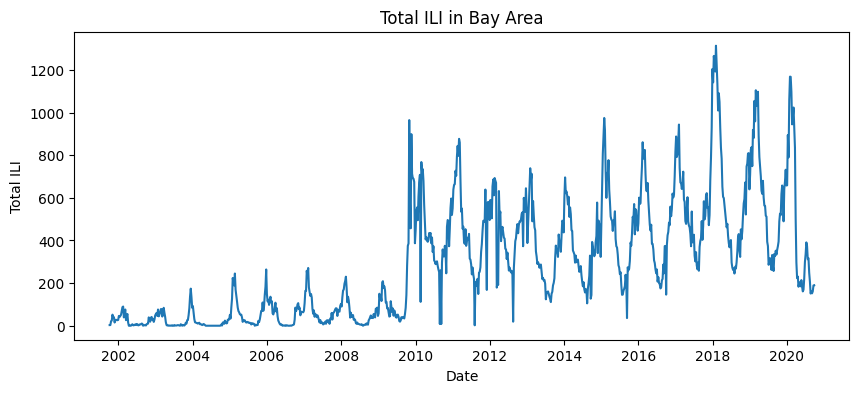

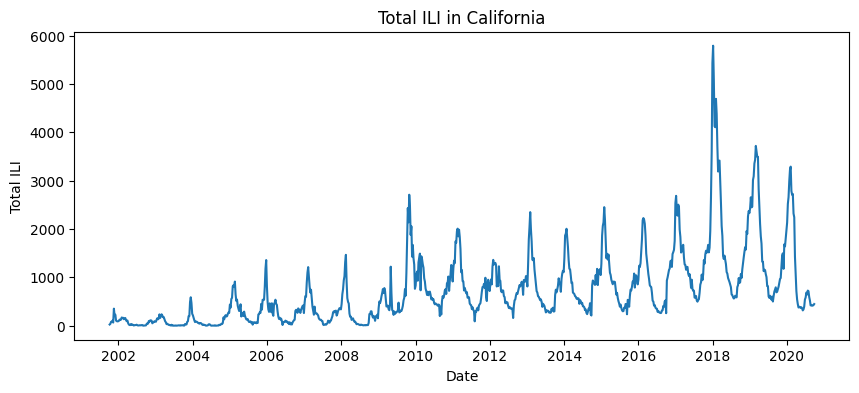

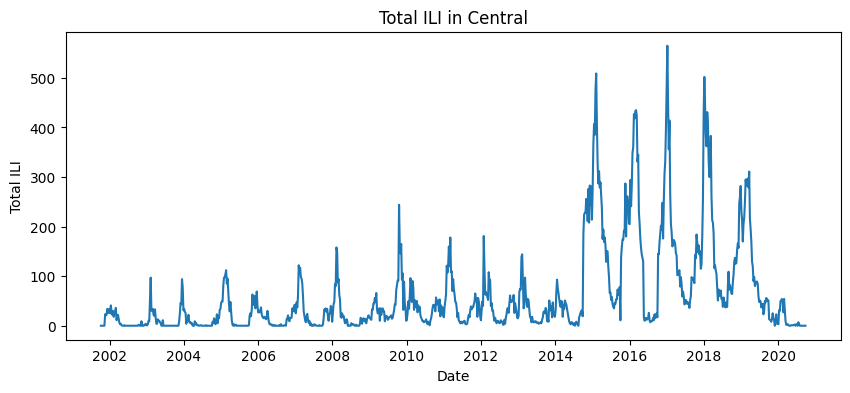

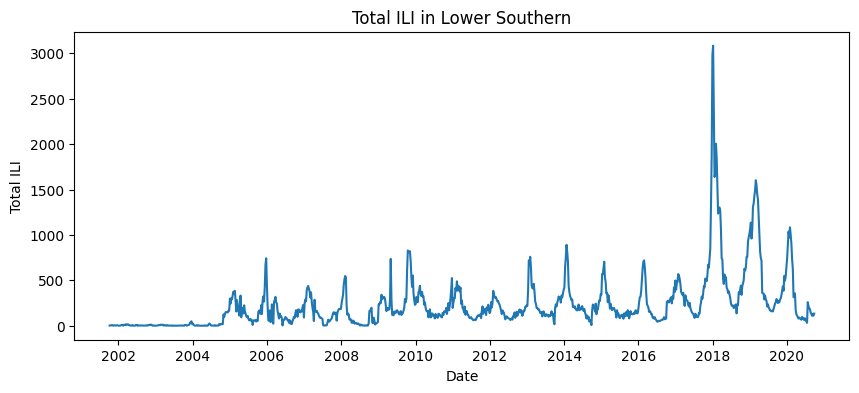

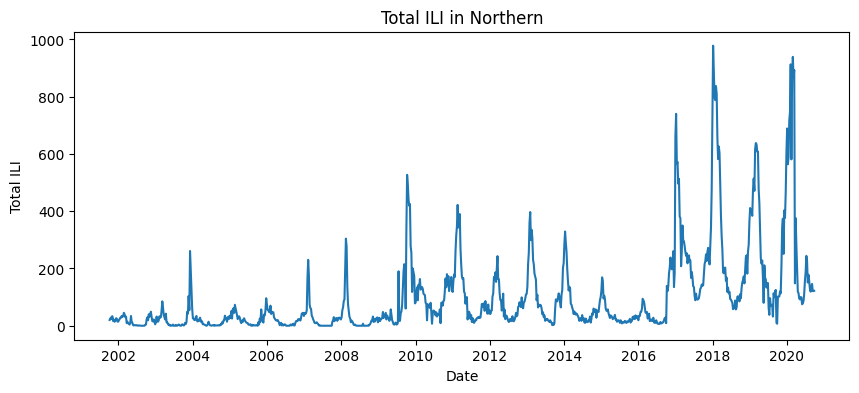

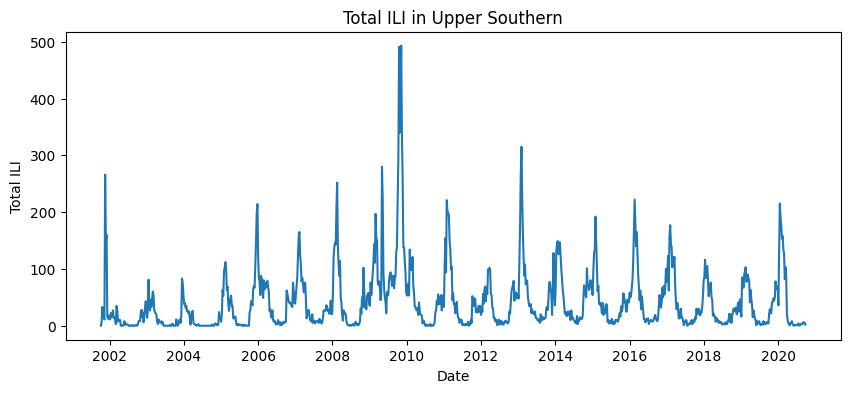

In [6]:
import matplotlib.pyplot as plt

for region, data in region_data.items():
    plt.figure(figsize=(10, 4))
    plt.plot(data)
    plt.title(f'Total ILI in {region}')
    plt.xlabel('Date')
    plt.ylabel('Total ILI')
    plt.show()

# ARIMA MODEL IMPLEMENTATION

**We'll apply the ARIMA model to each region's data**

<ipython-input-7-88fc889b11f9>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['weekending'] = pd.to_datetime(df['weekending'])


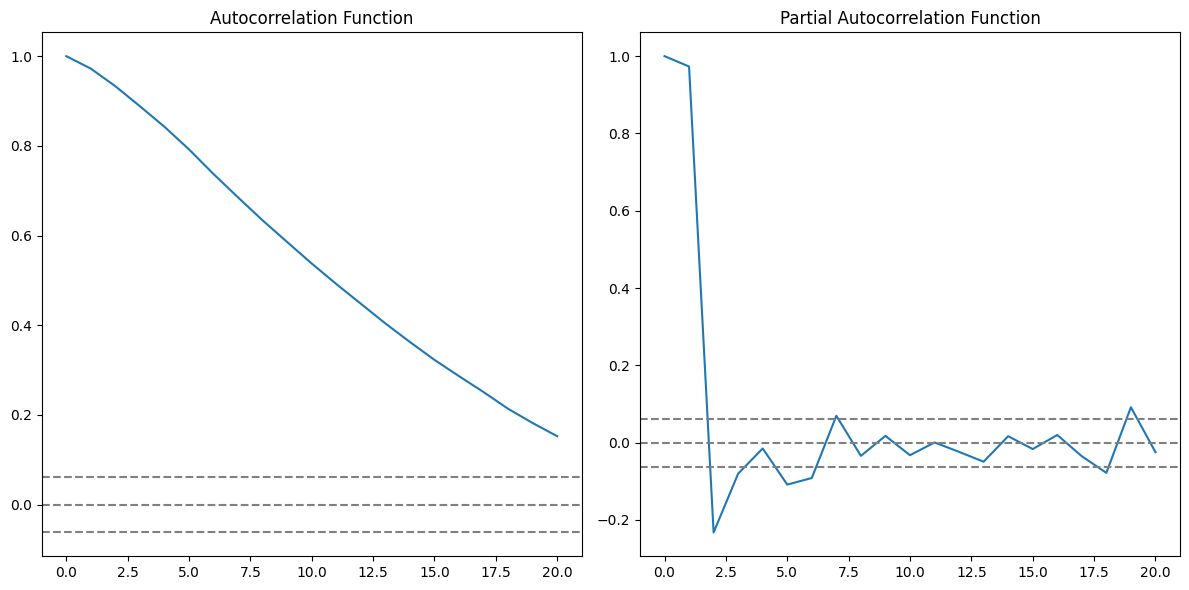

In [7]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import acf, pacf
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/data/flu-ili-byregion-fluseason_data.csv')
df['weekending'] = pd.to_datetime(df['weekending'])
df.set_index('weekending', inplace=True)

# California region
region_data = df[df['region'] == 'California']['Total_ILI']

# Plot ACF and PACF
plt.figure(figsize=(12, 6))

# ACF
plt.subplot(121)
plt.plot(acf(region_data, nlags=20))
plt.title('Autocorrelation Function')
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(region_data)), linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(region_data)), linestyle='--', color='gray')

# PACF
plt.subplot(122)
plt.plot(pacf(region_data, nlags=20))
plt.title('Partial Autocorrelation Function')
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(region_data)), linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(region_data)), linestyle='--', color='gray')

plt.tight_layout()
plt.show()

Test on ARIMA model with parameters 1,1,0

<ipython-input-8-dca12f10895a>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['weekending'] = pd.to_datetime(df['weekending'])
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Total_ILI   No. Observations:                  991
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -5711.384
Date:                Sun, 19 May 2024   AIC                          11426.767
Time:                        04:13:19   BIC                          11436.563
Sample:                    10-06-2001   HQIC                         11430.492
                         - 09-26-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2079      0.014    -14.897      0.000      -0.235      -0.181
sigma2      6010.3400    102.289     58.759      0.000    5809.857    6210.822
Ljung-Box (L1) (Q):                   0.09   Jarque-

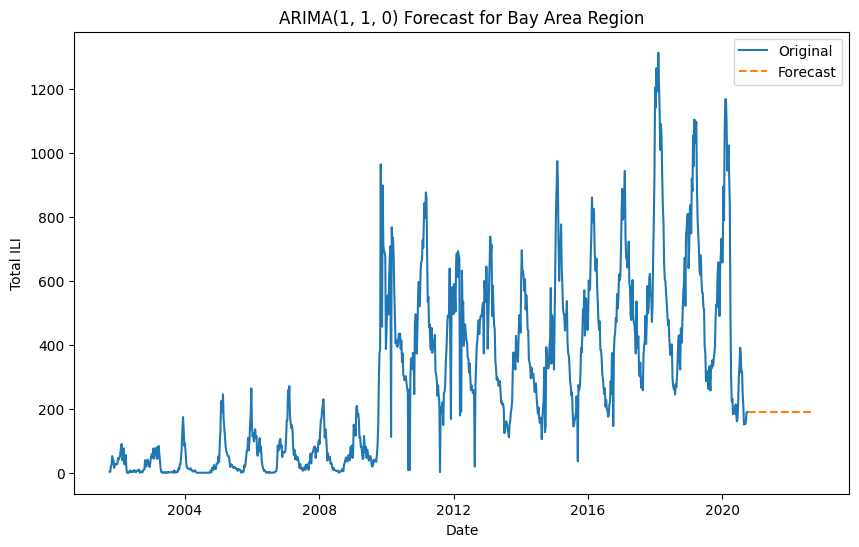

In [8]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/data/flu-ili-byregion-fluseason_data.csv')
df['weekending'] = pd.to_datetime(df['weekending'])
df.set_index('weekending', inplace=True)

# Example data for the Bay Area region
region_data = df[df['region'] == 'Bay Area']['Total_ILI']

# ARIMA(1, 1, 0)
model_110 = ARIMA(region_data, order=(1, 1, 0))
model_fit_110 = model_110.fit()
print(model_fit_110.summary())

# Forecast
steps = 104
forecast_110 = model_fit_110.forecast(steps=steps)

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(region_data, label='Original')
plt.plot(forecast_110, label='Forecast', linestyle='--')
plt.title('ARIMA(1, 1, 0) Forecast for Bay Area Region')
plt.xlabel('Date')
plt.ylabel('Total ILI')
plt.legend()
plt.show()

**Prediction & Forecasting for 5 years with ARIMA model**

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/data/flu-ili-byregion-fluseason_data.csv')

# Convert weekending to datetime format
df['weekending'] = pd.to_datetime(df['weekending'])

# Set the index to weekending
df.set_index('weekending', inplace=True)

# Filter data for each region
regions = df['region'].unique()
region_data = {region: df[df['region'] == region]['Total_ILI'] for region in regions}

<ipython-input-9-82a2b884156f>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['weekending'] = pd.to_datetime(df['weekending'])


In [10]:
# Function to fit ARIMA model and forecast with parameter 1,1,1
def fit_arima_forecast(data, order=(1,1,1), steps=200):
    train_size = int(len(data) * 0.8)
    train, test = data[:train_size], data[train_size:]

    # Fit the model
    model = ARIMA(train, order=order)
    model_fit = model.fit()

    # Forecast
    forecast = model_fit.forecast(steps=len(test))

    # Calculate error metrics
    mae = mean_absolute_error(test, forecast)
    mse = mean_squared_error(test, forecast)
    rmse = np.sqrt(mse)

    # Full forecast
    full_forecast = model_fit.forecast(steps=steps)

    return full_forecast, mae, mse, rmse

In [11]:
# Apply ARIMA to each region
arima_order = (1, 1, 1)

forecasts = {}
error_metrics = {}
for region, data in region_data.items():
    full_forecast, mae, mse, rmse = fit_arima_forecast(data, order=arima_order)
    forecasts[region] = full_forecast
    error_metrics[region] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse}

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  

Forecast for Bay Area:
2016-12-10    593.602883
2016-12-17    592.824192
2016-12-24    592.801222
2016-12-31    592.800544
2017-01-07    592.800524
                 ...    
2020-09-05    592.800524
2020-09-12    592.800524
2020-09-19    592.800524
2020-09-26    592.800524
2020-10-03    592.800524
Freq: W-SAT, Name: predicted_mean, Length: 200, dtype: float64
Error Metrics for Bay Area:
MAE: 233.43713307483853
MSE: 79557.75296906629
RMSE: 282.05983934099214


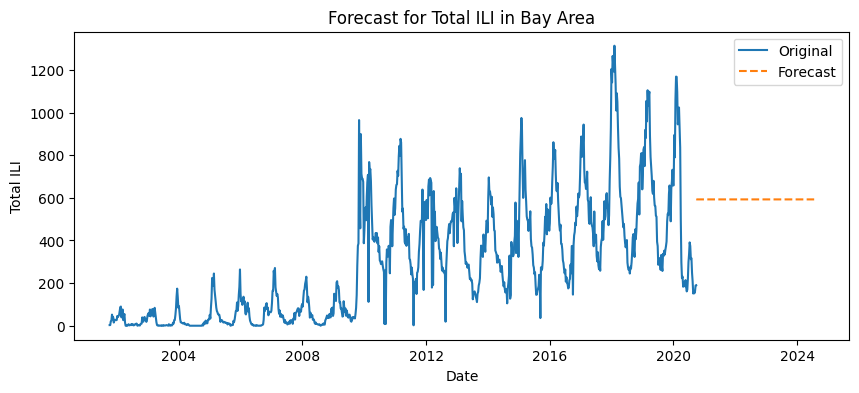

Forecast for California:
2016-12-10    1495.124585
2016-12-17    1502.717900
2016-12-24    1507.473397
2016-12-31    1510.451643
2017-01-07    1512.316841
                 ...     
2020-09-05    1515.442463
2020-09-12    1515.442463
2020-09-19    1515.442463
2020-09-26    1515.442463
2020-10-03    1515.442463
Freq: W-SAT, Name: predicted_mean, Length: 200, dtype: float64
Error Metrics for California:
MAE: 835.2610207401071
MSE: 1160572.0253345328
RMSE: 1077.2984847917187


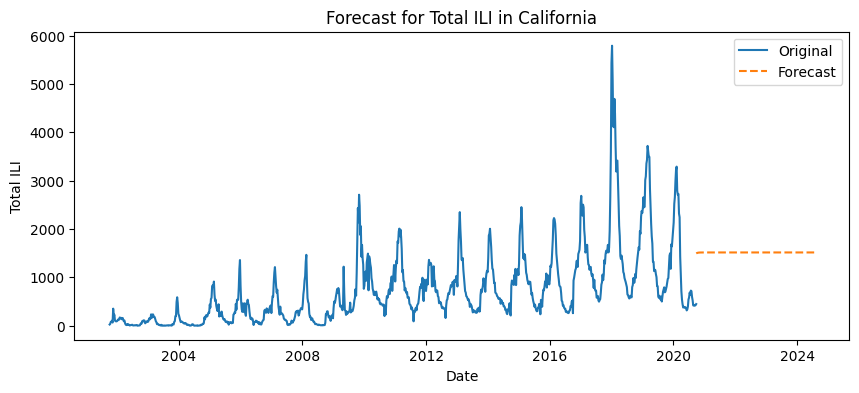

Forecast for Central:
2016-12-10    232.520177
2016-12-17    242.380473
2016-12-24    237.389389
2016-12-31    239.915776
2017-01-07    238.636969
                 ...    
2020-09-05    239.066736
2020-09-12    239.066736
2020-09-19    239.066736
2020-09-26    239.066736
2020-10-03    239.066736
Freq: W-SAT, Name: predicted_mean, Length: 200, dtype: float64
Error Metrics for Central:
MAE: 156.43906925344191
MSE: 29168.636371208147
RMSE: 170.78827937305343


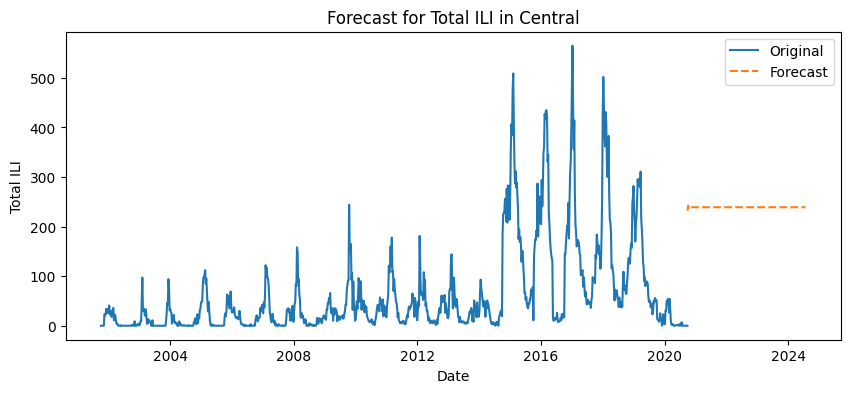

Forecast for Lower Southern:
2016-12-10    335.312798
2016-12-17    324.138026
2016-12-24    334.279956
2016-12-31    325.075407
2017-01-07    333.429214
                 ...    
2020-09-05    329.454691
2020-09-12    329.454691
2020-09-19    329.454691
2020-09-26    329.454691
2020-10-03    329.454691
Freq: W-SAT, Name: predicted_mean, Length: 200, dtype: float64
Error Metrics for Lower Southern:
MAE: 331.96799981191026
MSE: 299340.43523028
RMSE: 547.1201287014397


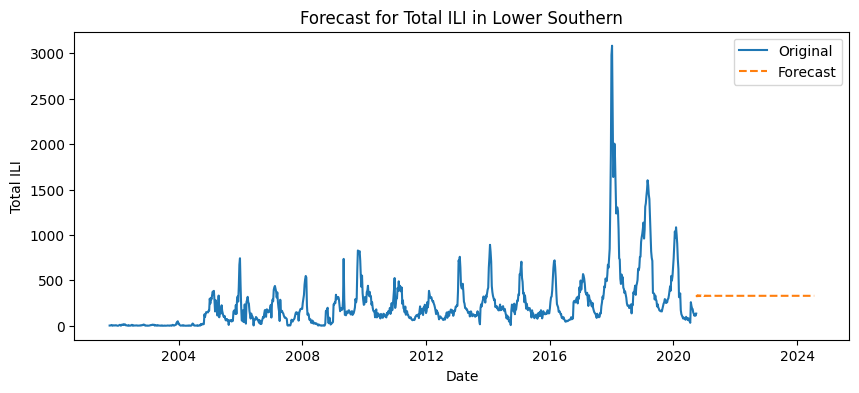

Forecast for Northern:
2016-12-10    217.753623
2016-12-17    217.917829
2016-12-24    217.808389
2016-12-31    217.881329
2017-01-07    217.832715
                 ...    
2020-09-05    217.852157
2020-09-12    217.852157
2020-09-19    217.852157
2020-09-26    217.852157
2020-10-03    217.852157
Freq: W-SAT, Name: predicted_mean, Length: 200, dtype: float64
Error Metrics for Northern:
MAE: 162.53415176283272
MSE: 54100.55860160248
RMSE: 232.59526779709532


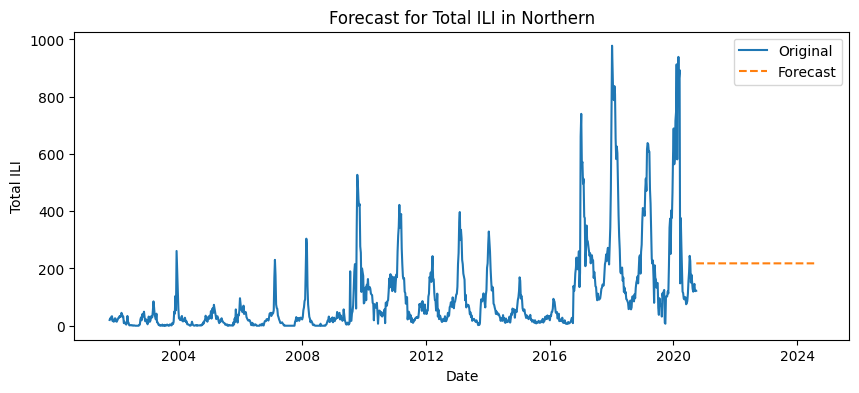

Forecast for Upper Southern:
2016-12-10    67.241474
2016-12-17    64.812551
2016-12-24    62.673849
2016-12-31    60.790690
2017-01-07    59.132542
                ...    
2020-09-05    46.913272
2020-09-12    46.913272
2020-09-19    46.913272
2020-09-26    46.913272
2020-10-03    46.913272
Freq: W-SAT, Name: predicted_mean, Length: 200, dtype: float64
Error Metrics for Upper Southern:
MAE: 37.72507423125461
MSE: 1989.7149200004103
RMSE: 44.606220642421725


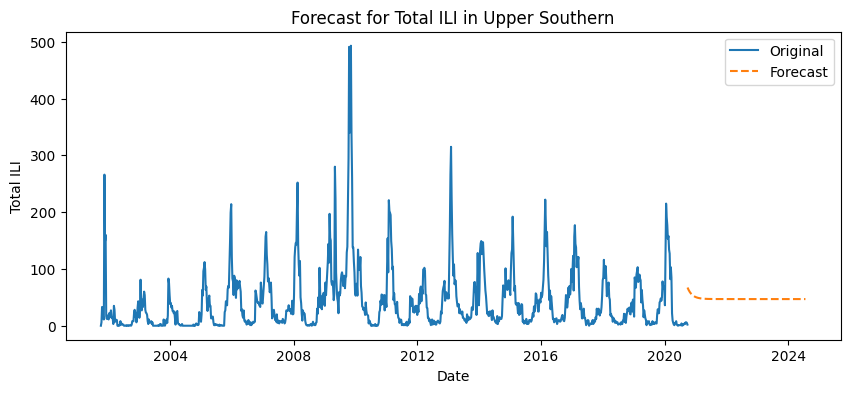

In [12]:
# Display the forecasts and error metrics
for region, forecast in forecasts.items():
    print(f'Forecast for {region}:')
    print(forecast)

    print(f'Error Metrics for {region}:')
    print(f"MAE: {error_metrics[region]['MAE']}")
    print(f"MSE: {error_metrics[region]['MSE']}")
    print(f"RMSE: {error_metrics[region]['RMSE']}")

    plt.figure(figsize=(10, 4))
    plt.plot(region_data[region], label='Original')
    plt.plot(pd.date_range(start=region_data[region].index[-1], periods=200, freq='W'), forecast, label='Forecast', linestyle='--')
    plt.title(f'Forecast for Total ILI in {region}')
    plt.xlabel('Date')
    plt.ylabel('Total ILI')
    plt.legend()
    plt.show()

The forecast results indicate that the ARIMA model's predictions for these regions are not aligning well with the observed data, as suggested by the high error metrics (MAE, MSE, RMSE) and the forecast plot showing a flat future trend. Here are a few suggestions to improve the ARIMA model's performance:

**Parameter Tuning - Use Grid Search to find optimal parameters pdq**

The ARIMA model parameters (p, d, q) need to be tuned carefully. The current parameters (1, 1, 1) might not be the best fit.

*Note: This process takes a while to complete.*

In [13]:
#from statsmodels.tsa.arima.model import ARIMA
#import itertools

## Define the p, d, and q parameters to take any value between 0 and 5
#p = d = q = range(0, 6)
## Generate all different combinations of p, d, and q triplets
#pdq = list(itertools.product(p, d, q))

## Define a function to find the best ARIMA model
#def find_best_arima_model(data):
#    best_aic = float("inf")
#    best_pdq = None
#    for param in pdq:
#        try:
#            temp_model = ARIMA(data, order=param)
#            results = temp_model.fit()
#            if results.aic < best_aic:
#                best_aic = results.aic
#                best_pdq = param
#        except:
#            continue
#    return best_pdq

## Find the best ARIMA parameters for each region
#best_pdq = {}
#for region, data in region_data.items():
#    best_pdq[region] = find_best_arima_model(data)
#    print(f'Best ARIMA parameters for {region}: {best_pdq[region]}')

# **Best ARIMA parameters for **
- Bay Area 315,
- California 105,
- Central 534,
- Lower southern, northern 054,
- Upper southern 514



# Seasonal ARIMA (SARIMA)
As our data shows seasonality, a seasonal ARIMA model might be more appropriate. We can use the seasonal_order parameter to model seasonality.

In [14]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the SARIMA model
def fit_sarima_forecast(data, order=(1,1,1), seasonal_order=(1,1,1,52), steps=260):
    train_size = int(len(data) * 0.8)
    train, test = data[:train_size], data[train_size:]

    # Fit the model
    model = SARIMAX(train, order=order, seasonal_order=seasonal_order)
    model_fit = model.fit(disp=False)

    # Forecast
    forecast = model_fit.forecast(steps=len(test))

    # Calculate error metrics
    mae = mean_absolute_error(test, forecast)
    mse = mean_squared_error(test, forecast)
    rmse = np.sqrt(mse)

    # Full forecast
    full_forecast = model_fit.forecast(steps=steps)

    return full_forecast, mae, mse, rmse

In [15]:
# Apply SARIMA to each region
sarima_order = (1, 1, 1)  # sarima order, we might want to tune this if needed
seasonal_order = (1, 1, 1, 52)  # seasonal order, we might want to tune this if needed

forecasts = {}
error_metrics = {}
for region, data in region_data.items():
    full_forecast, mae, mse, rmse = fit_sarima_forecast(data, order=sarima_order, seasonal_order=seasonal_order)
    forecasts[region] = full_forecast
    error_metrics[region] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse}

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  

Forecast for Bay Area:
2016-12-10    609.995515
2016-12-17    575.962431
2016-12-24    543.050768
2016-12-31    596.530778
2017-01-07    650.351821
                 ...    
2021-10-30    697.021981
2021-11-06    736.725137
2021-11-13    710.309187
2021-11-20    686.805854
2021-11-27    758.084582
Freq: W-SAT, Name: predicted_mean, Length: 260, dtype: float64
Error Metrics for Bay Area:
MAE: 150.3677893253182
MSE: 40715.911966610955
RMSE: 201.78184250970392


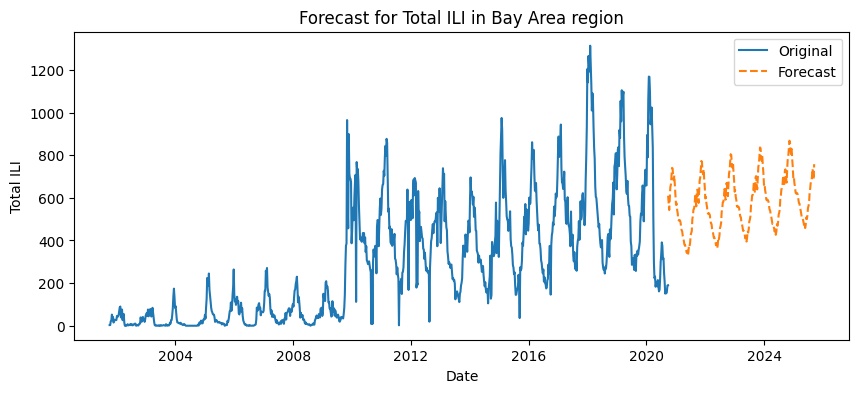

Forecast for California:
2016-12-10    1501.142161
2016-12-17    1422.724859
2016-12-24    1373.860580
2016-12-31    1482.561024
2017-01-07    1671.384555
                 ...     
2021-10-30    1853.908071
2021-11-06    1868.655290
2021-11-13    1824.230032
2021-11-20    1821.240902
2021-11-27    1941.642088
Freq: W-SAT, Name: predicted_mean, Length: 260, dtype: float64
Error Metrics for California:
MAE: 597.2675092090069
MSE: 743163.5354318781
RMSE: 862.0693333090315


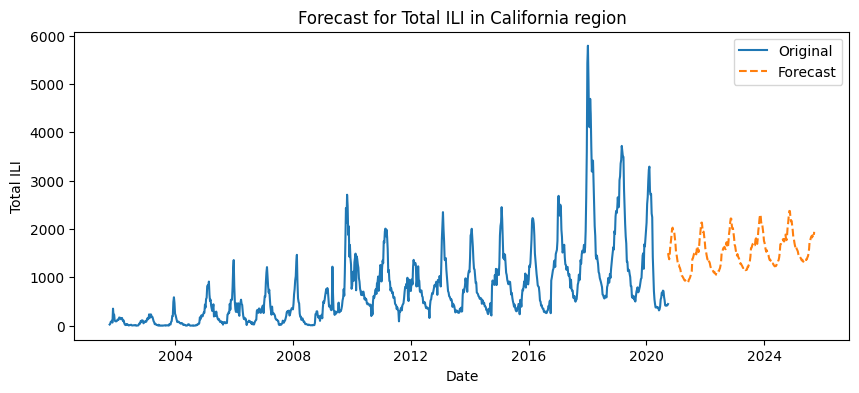

Forecast for Central:
2016-12-10    228.305004
2016-12-17    229.569029
2016-12-24    201.328186
2016-12-31    220.291443
2017-01-07    278.673153
                 ...    
2021-10-30    345.439975
2021-11-06    337.126494
2021-11-13    377.019829
2021-11-20    326.524990
2021-11-27    378.239560
Freq: W-SAT, Name: predicted_mean, Length: 260, dtype: float64
Error Metrics for Central:
MAE: 134.97468110887945
MSE: 26414.526326219628
RMSE: 162.52546362407224


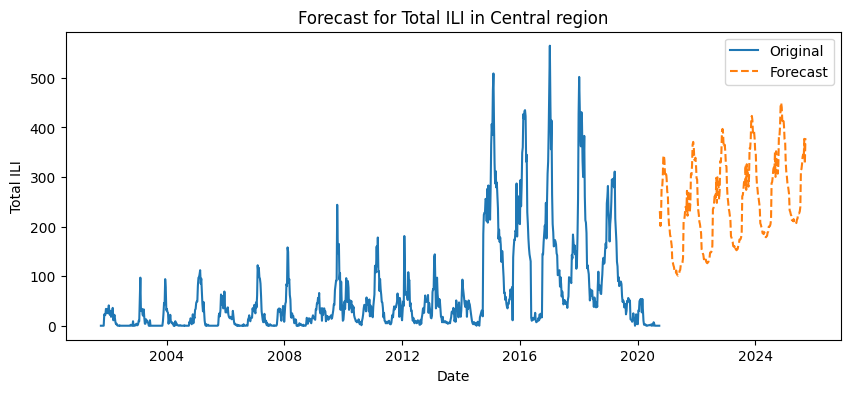

Forecast for Lower Southern:
2016-12-10    329.991848
2016-12-17    307.378949
2016-12-24    297.139933
2016-12-31    312.016687
2017-01-07    368.208607
                 ...    
2021-10-30    358.559378
2021-11-06    347.490427
2021-11-13    337.464183
2021-11-20    357.888110
2021-11-27    384.870627
Freq: W-SAT, Name: predicted_mean, Length: 260, dtype: float64
Error Metrics for Lower Southern:
MAE: 295.1774445084552
MSE: 269819.7689181196
RMSE: 519.4417858799189


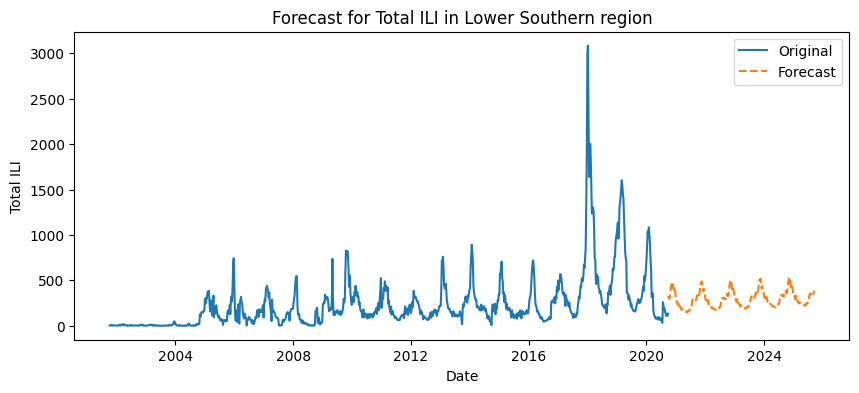

Forecast for Northern:
2016-12-10    205.075381
2016-12-17    186.092299
2016-12-24    177.194920
2016-12-31    178.720851
2017-01-07    184.183912
                 ...    
2021-10-30    127.706437
2021-11-06    123.683538
2021-11-13    122.607290
2021-11-20    127.312268
2021-11-27    126.799581
Freq: W-SAT, Name: predicted_mean, Length: 260, dtype: float64
Error Metrics for Northern:
MAE: 186.22611432421132
MSE: 72505.84834940084
RMSE: 269.26910024991884


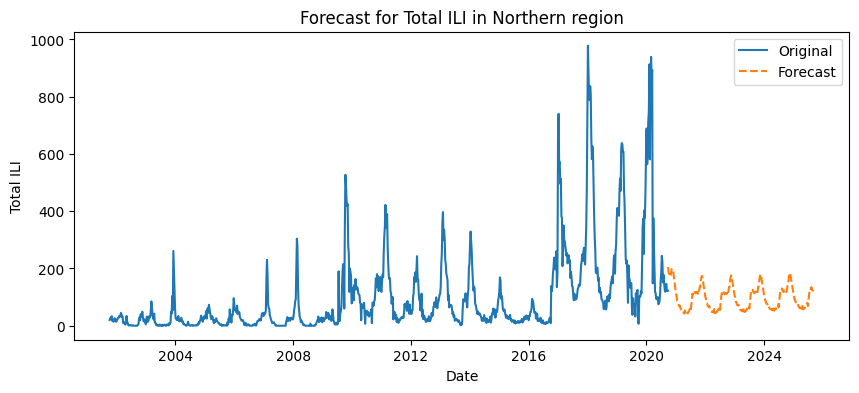

Forecast for Upper Southern:
2016-12-10    72.088909
2016-12-17    54.535589
2016-12-24    52.767256
2016-12-31    73.577141
2017-01-07    82.308965
                ...    
2021-10-30    87.002294
2021-11-06    80.423275
2021-11-13    64.229583
2021-11-20    74.045467
2021-11-27    79.605173
Freq: W-SAT, Name: predicted_mean, Length: 260, dtype: float64
Error Metrics for Upper Southern:
MAE: 25.942423094378523
MSE: 953.01873933148
RMSE: 30.87100159261892


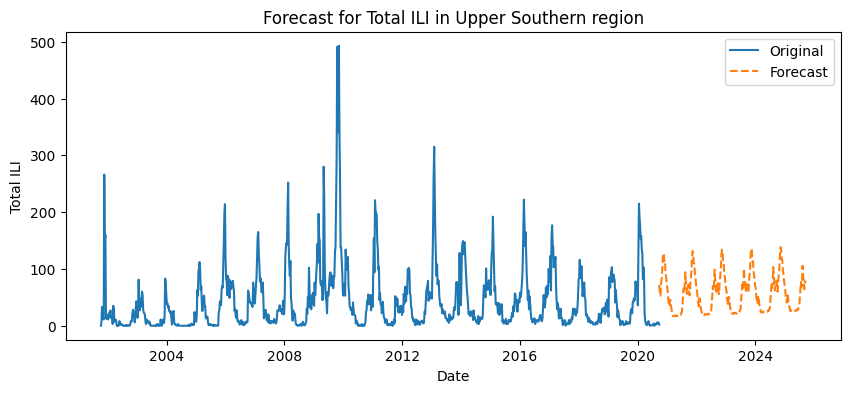

In [16]:
 # Display the forecasts and error metrics
for region, forecast in forecasts.items():
    print(f'Forecast for {region}:')
    print(forecast)

    print(f'Error Metrics for {region}:')
    print(f"MAE: {error_metrics[region]['MAE']}")
    print(f"MSE: {error_metrics[region]['MSE']}")
    print(f"RMSE: {error_metrics[region]['RMSE']}")

    plt.figure(figsize=(10, 4))
    plt.plot(region_data[region], label='Original')
    plt.plot(pd.date_range(start=region_data[region].index[-1], periods=260, freq='W'), forecast, label='Forecast', linestyle='--')
    plt.title(f'Forecast for Total ILI in {region} region')
    plt.xlabel('Date')
    plt.ylabel('Total ILI')
    plt.legend()
    plt.show()

In [17]:
# Summarize all of these error value in a table view:
import pandas as pd

# Create a list to store the data for each region
results = []

# Loop through each region and gather the error metrics
for region in error_metrics:
    mae = error_metrics[region]['MAE']
    mse = error_metrics[region]['MSE']
    rmse = error_metrics[region]['RMSE']
    results.append([region, mae, mse, rmse])

# Create a DataFrame from the results list
results_df = pd.DataFrame(results, columns=['Region', 'MAE', 'MSE', 'RMSE'])

# Display the DataFrame
print("Results of the SARIMA Model: (1,1,1) (1,1,1,52)")
print(results_df)

Results of the SARIMA Model: (1,1,1) (1,1,1,52)
           Region         MAE            MSE        RMSE
0        Bay Area  150.367789   40715.911967  201.781843
1      California  597.267509  743163.535432  862.069333
2         Central  134.974681   26414.526326  162.525464
3  Lower Southern  295.177445  269819.768918  519.441786
4        Northern  186.226114   72505.848349  269.269100
5  Upper Southern   25.942423     953.018739   30.871002


In [18]:
# Results of the SARIMA Model: (1,1,0) (1,1,1,52)
#            Region         MAE            MSE        RMSE
# 0        Bay Area  166.256380   46025.119489  214.534658
# 1      California  610.496138  774592.114511  880.109149
# 2         Central  134.975760   26414.431777  162.525173
# 3  Lower Southern  286.028678  257794.099198  507.734280
# 4        Northern  142.919814   42120.426999  205.232617
# 5  Upper Southern   26.766404     995.410579   31.550128

In [19]:
# Results of the SARIMA Model: (1,1,1) (1,1,1,52)
#            Region         MAE            MSE        RMSE
# 0        Bay Area  150.367789   40715.911967  201.781843
# 1      California  597.267509  743163.535432  862.069333
# 2         Central  134.974681   26414.526326  162.525464
# 3  Lower Southern  295.177445  269819.768918  519.441786
# 4        Northern  186.226114   72505.848349  269.269100
# 5  Upper Southern   25.942423     953.018739   30.871002

# Further Tuning SARIMA model for Forecasting

For regions with high errors (e.g., California, Lower Southern), consider tuning the ARIMA parameters further or trying different models like SARIMA to capture seasonality.
Use cross-validation to find the best parameters.

**Application on California dataset**

**Evaluate the SARIMA model for the California dataset, you can follow these steps:**

- Model Diagnostics:

 - Plot the residuals to check for patterns.
 - Plot the ACF and PACF of the residuals to check for remaining autocorrelation.
 - Perform statistical tests on the residuals (e.g., Ljung-Box test).

- Error Metrics:

 - Split the data into training and test sets.
 - Fit the SARIMA model on the training set and forecast on the test set.
 - Calculate error metrics (MAE, MSE, RMSE) on the test set.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


MAE: 597.2675092090069
MSE: 743163.5354318781
RMSE: 862.0693333090315


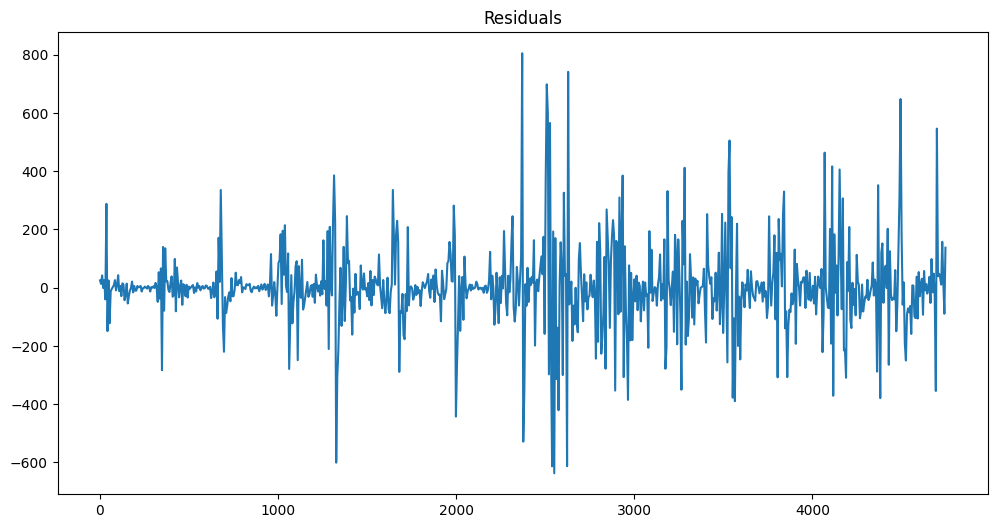

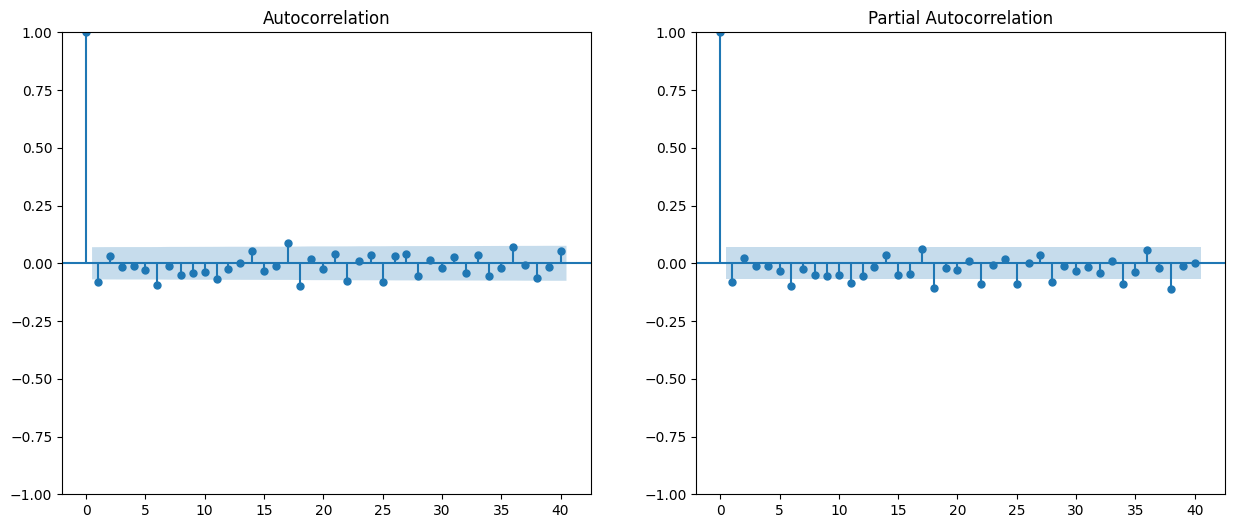

Ljung-Box test results:
      lb_stat  lb_pvalue
10  18.697309    0.04428


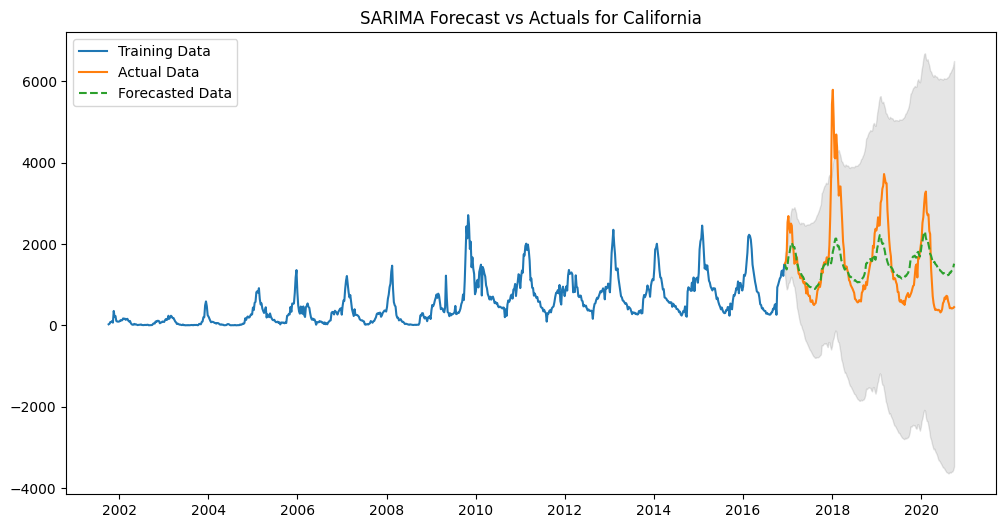

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.stats.diagnostic import acorr_ljungbox
import statsmodels.api as sm  # Import statsmodels as sm

# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/data/flu-ili-byregion-fluseason_data.csv')

# Convert weekending to datetime format
df['weekending'] = pd.to_datetime(df['weekending'], format='%m/%d/%y')

# Filter data for California region
df_california = df[df['region'] == 'California'][['weekending', 'Total_ILI']].rename(columns={'weekending': 'ds', 'Total_ILI': 'y'})

# Split data into training and test sets
train_size = int(len(df_california) * 0.8)
train_df = df_california[:train_size]
test_df = df_california[train_size:]

# Fit SARIMA model on training data
sarima_model = SARIMAX(train_df['y'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 52))
sarima_result = sarima_model.fit(disp=False)

# Forecast on the test set
forecast = sarima_result.get_forecast(steps=len(test_df))
forecast_df = forecast.conf_int()
forecast_df['yhat'] = forecast.predicted_mean
forecast_df['y'] = test_df['y'].values

# Calculate error metrics
mae = mean_absolute_error(test_df['y'], forecast_df['yhat'])
mse = mean_squared_error(test_df['y'], forecast_df['yhat'])
rmse = np.sqrt(mse)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

# Plot residuals
residuals = sarima_result.resid
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuals')
plt.show()

# Plot ACF and PACF of residuals
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
fig = sm.graphics.tsa.plot_acf(residuals, lags=40, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(residuals, lags=40, ax=ax[1])
plt.show()

# Perform Ljung-Box test
ljung_box_result = acorr_ljungbox(residuals, lags=[10], return_df=True)
print("Ljung-Box test results:")
print(ljung_box_result)

# Plotting forecast vs actuals
plt.figure(figsize=(12, 6))
plt.plot(train_df['ds'], train_df['y'], label='Training Data')
plt.plot(test_df['ds'], test_df['y'], label='Actual Data')
plt.plot(test_df['ds'], forecast_df['yhat'], label='Forecasted Data', linestyle='--')
plt.fill_between(test_df['ds'], forecast_df['lower y'], forecast_df['upper y'], color='k', alpha=0.1)
plt.title('SARIMA Forecast vs Actuals for California')
plt.legend()
plt.show()

# Evaluate // SARIMA model - Evaluate Bay Area region

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


MAE: 150.3677893253182
MSE: 40715.911966610955
RMSE: 201.78184250970392


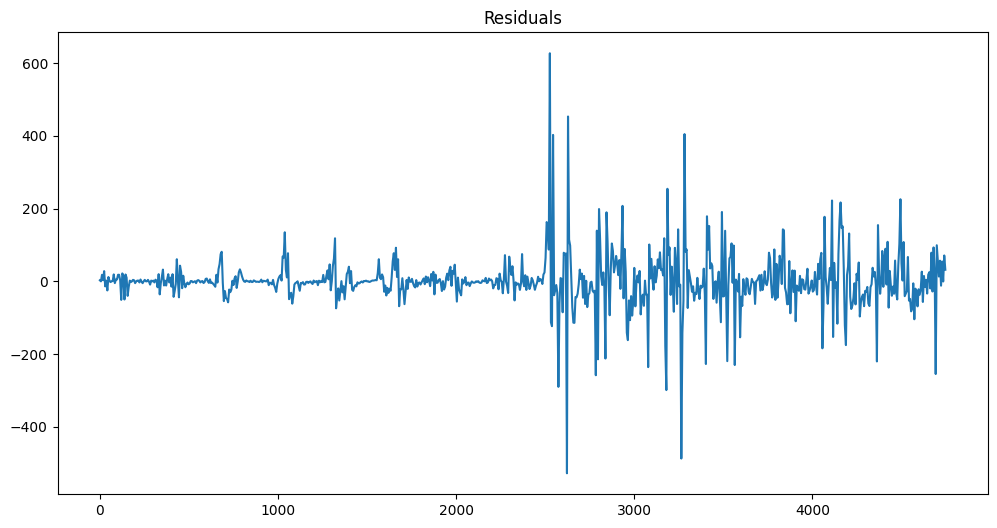

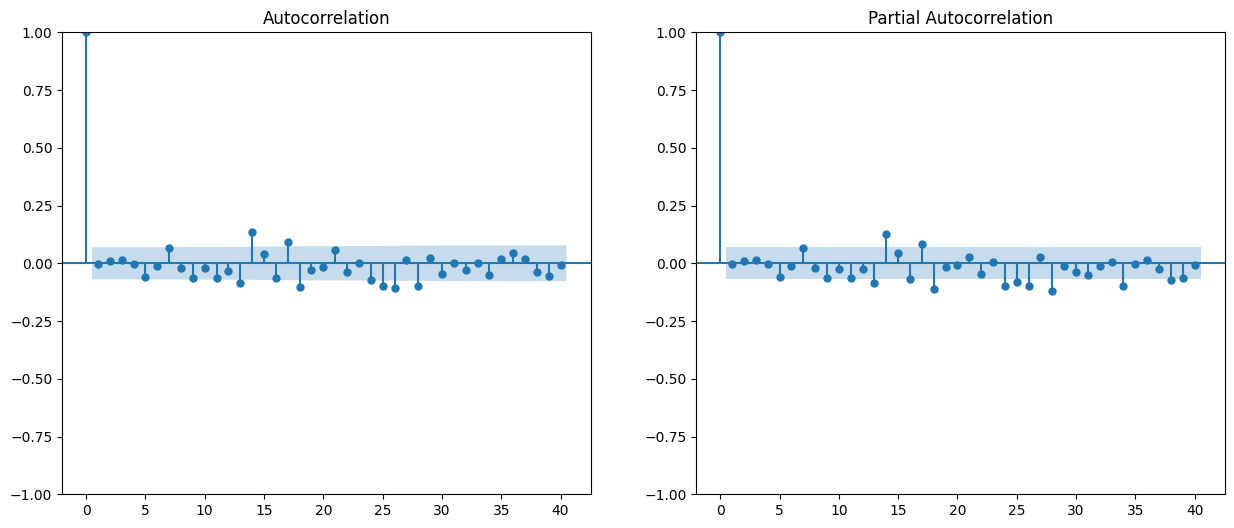

Ljung-Box test results:
      lb_stat  lb_pvalue
10  10.406869   0.405551


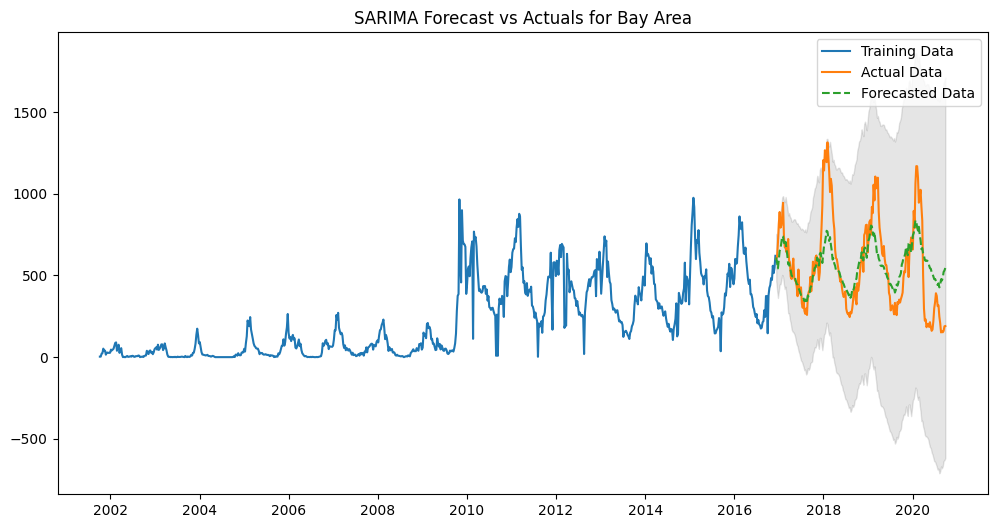

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.stats.diagnostic import acorr_ljungbox
import statsmodels.api as sm  # Import statsmodels as sm

# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/data/flu-ili-byregion-fluseason_data.csv')

# Convert weekending to datetime format
df['weekending'] = pd.to_datetime(df['weekending'], format='%m/%d/%y')

# Filter data for Bay Area region
df_bay_area = df[df['region'] == 'Bay Area'][['weekending', 'Total_ILI']].rename(columns={'weekending': 'ds', 'Total_ILI': 'y'})

# Split data into training and test sets
train_size = int(len(df_bay_area) * 0.8)
train_df = df_bay_area[:train_size]
test_df = df_bay_area[train_size:]

# Fit SARIMA model on training data
sarima_model = SARIMAX(train_df['y'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 52))
sarima_result = sarima_model.fit(disp=False)

# Forecast on the test set
forecast = sarima_result.get_forecast(steps=len(test_df))
forecast_df = forecast.conf_int()
forecast_df['yhat'] = forecast.predicted_mean
forecast_df['y'] = test_df['y'].values

# Calculate error metrics
mae = mean_absolute_error(test_df['y'], forecast_df['yhat'])
mse = mean_squared_error(test_df['y'], forecast_df['yhat'])
rmse = np.sqrt(mse)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

# Plot residuals
residuals = sarima_result.resid
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuals')
plt.show()

# Plot ACF and PACF of residuals
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
fig = sm.graphics.tsa.plot_acf(residuals, lags=40, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(residuals, lags=40, ax=ax[1])
plt.show()

# Perform Ljung-Box test
ljung_box_result = acorr_ljungbox(residuals, lags=[10], return_df=True)
print("Ljung-Box test results:")
print(ljung_box_result)

# Plotting forecast vs actuals
plt.figure(figsize=(12, 6))
plt.plot(train_df['ds'], train_df['y'], label='Training Data')
plt.plot(test_df['ds'], test_df['y'], label='Actual Data')
plt.plot(test_df['ds'], forecast_df['yhat'], label='Forecasted Data', linestyle='--')
plt.fill_between(test_df['ds'], forecast_df['lower y'], forecast_df['upper y'], color='k', alpha=0.1)
plt.title('SARIMA Forecast vs Actuals for Bay Area')
plt.legend()
plt.show()

# Evaluate // SARIMA model for Central region

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


MAE: 134.97468110887945
MSE: 26414.526326219628
RMSE: 162.52546362407224


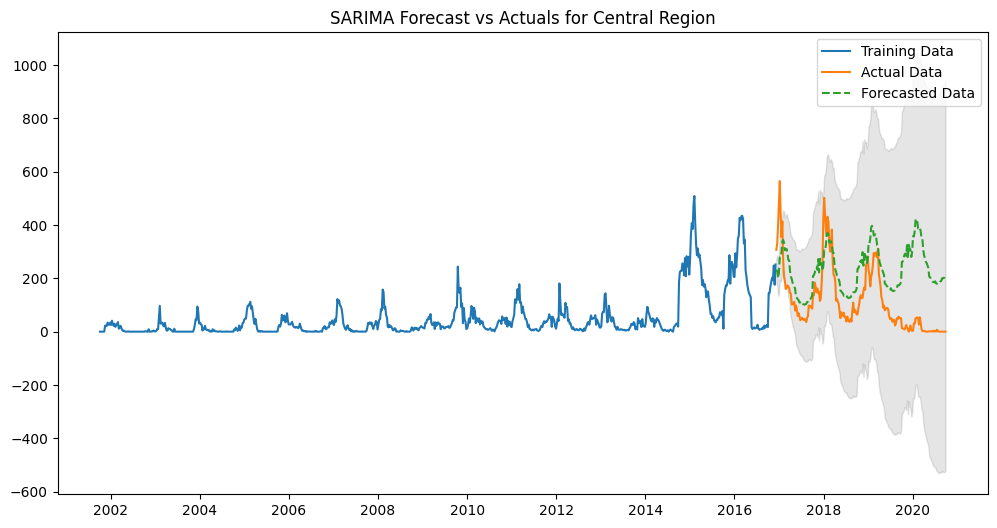

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import statsmodels.api as sm

# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/data/flu-ili-byregion-fluseason_data.csv')

# Convert weekending to datetime format
df['weekending'] = pd.to_datetime(df['weekending'], format='%m/%d/%y')

# Filter data for Central region
df_central = df[df['region'] == 'Central'][['weekending', 'Total_ILI']].rename(columns={'weekending': 'ds', 'Total_ILI': 'y'})

# Split data into training and test sets
train_size = int(len(df_central) * 0.8)
train_df = df_central[:train_size]
test_df = df_central[train_size:]

# Fit SARIMA model on training data
sarima_model = SARIMAX(train_df['y'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 52))
sarima_result = sarima_model.fit(disp=False)

# Forecast on the test set
forecast = sarima_result.get_forecast(steps=len(test_df))
forecast_df = forecast.conf_int()
forecast_df['yhat'] = forecast.predicted_mean
forecast_df['y'] = test_df['y'].values

# Calculate error metrics
mae = mean_absolute_error(test_df['y'], forecast_df['yhat'])
mse = mean_squared_error(test_df['y'], forecast_df['yhat'])
rmse = np.sqrt(mse)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

# Plotting forecast vs actuals
plt.figure(figsize=(12, 6))
plt.plot(train_df['ds'], train_df['y'], label='Training Data')
plt.plot(test_df['ds'], test_df['y'], label='Actual Data')
plt.plot(test_df['ds'], forecast_df['yhat'], label='Forecasted Data', linestyle='--')
plt.fill_between(test_df['ds'], forecast_df['lower y'], forecast_df['upper y'], color='k', alpha=0.1)
plt.title('SARIMA Forecast vs Actuals for Central Region')
plt.legend()
plt.show()


# Evaluate // SARIMA model for Northern region

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


MAE: 186.22611432421132
MSE: 72505.84834940084
RMSE: 269.26910024991884


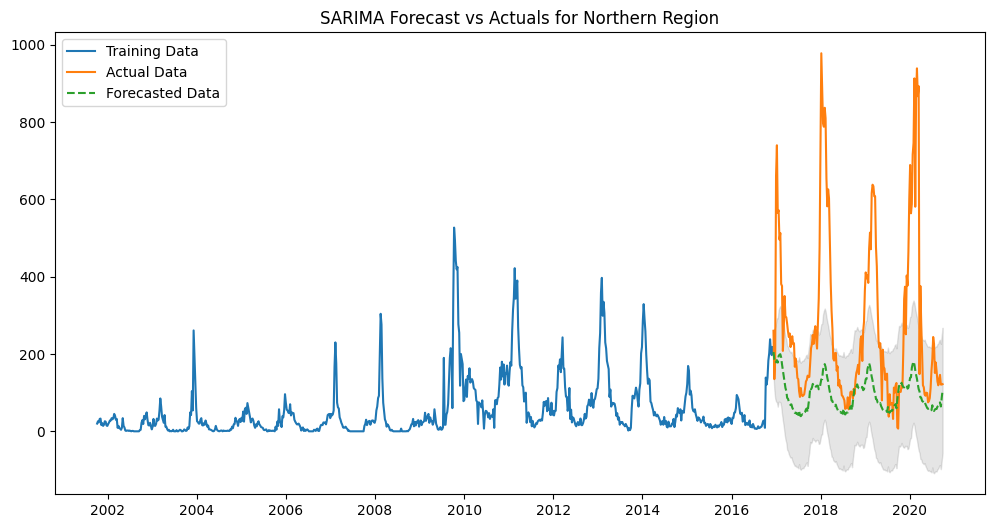

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import statsmodels.api as sm

# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/data/flu-ili-byregion-fluseason_data.csv')

# Convert weekending to datetime format
df['weekending'] = pd.to_datetime(df['weekending'], format='%m/%d/%y')

# Filter data for Central region
df_northern = df[df['region'] == 'Northern'][['weekending', 'Total_ILI']].rename(columns={'weekending': 'ds', 'Total_ILI': 'y'})

# Split data into training and test sets
train_size = int(len(df_northern) * 0.8)
train_df = df_northern[:train_size]
test_df = df_northern[train_size:]

# Fit SARIMA model on training data
sarima_model = SARIMAX(train_df['y'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 52))
sarima_result = sarima_model.fit(disp=False)

# Forecast on the test set
forecast = sarima_result.get_forecast(steps=len(test_df))
forecast_df = forecast.conf_int()
forecast_df['yhat'] = forecast.predicted_mean
forecast_df['y'] = test_df['y'].values

# Calculate error metrics
mae = mean_absolute_error(test_df['y'], forecast_df['yhat'])
mse = mean_squared_error(test_df['y'], forecast_df['yhat'])
rmse = np.sqrt(mse)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

# Plotting forecast vs actuals
plt.figure(figsize=(12, 6))
plt.plot(train_df['ds'], train_df['y'], label='Training Data')
plt.plot(test_df['ds'], test_df['y'], label='Actual Data')
plt.plot(test_df['ds'], forecast_df['yhat'], label='Forecasted Data', linestyle='--')
plt.fill_between(test_df['ds'], forecast_df['lower y'], forecast_df['upper y'], color='k', alpha=0.1)
plt.title('SARIMA Forecast vs Actuals for Northern Region')
plt.legend()
plt.show()


# Evaluate // SARIMA model for Upper Southern region

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


MAE: 25.942423094378523
MSE: 953.01873933148
RMSE: 30.87100159261892


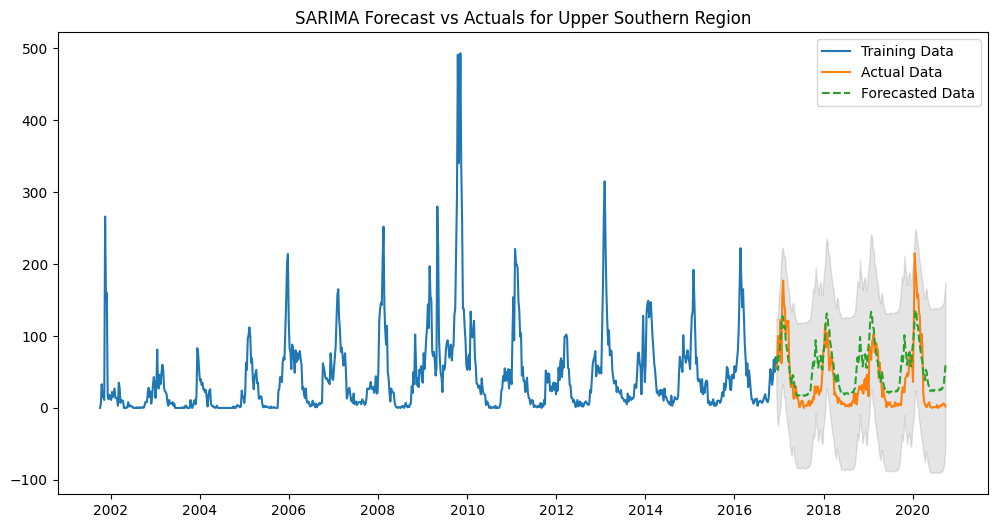

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import statsmodels.api as sm

# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/data/flu-ili-byregion-fluseason_data.csv')

# Convert weekending to datetime format
df['weekending'] = pd.to_datetime(df['weekending'], format='%m/%d/%y')

# Filter data for Upper Southern region
df_upper_southern = df[df['region'] == 'Upper Southern'][['weekending', 'Total_ILI']].rename(columns={'weekending': 'ds', 'Total_ILI': 'y'})

# Split data into training and test sets
train_size = int(len(df_upper_southern) * 0.8)
train_df = df_upper_southern[:train_size]
test_df = df_upper_southern[train_size:]

# Fit SARIMA model on training data
sarima_model = SARIMAX(train_df['y'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 52))
sarima_result = sarima_model.fit(disp=False)

# Forecast on the test set
forecast = sarima_result.get_forecast(steps=len(test_df))
forecast_df = forecast.conf_int()
forecast_df['yhat'] = forecast.predicted_mean
forecast_df['y'] = test_df['y'].values

# Calculate error metrics
mae = mean_absolute_error(test_df['y'], forecast_df['yhat'])
mse = mean_squared_error(test_df['y'], forecast_df['yhat'])
rmse = np.sqrt(mse)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

# Plotting forecast vs actuals
plt.figure(figsize=(12, 6))
plt.plot(train_df['ds'], train_df['y'], label='Training Data')
plt.plot(test_df['ds'], test_df['y'], label='Actual Data')
plt.plot(test_df['ds'], forecast_df['yhat'], label='Forecasted Data', linestyle='--')
plt.fill_between(test_df['ds'], forecast_df['lower y'], forecast_df['upper y'], color='k', alpha=0.1)
plt.title('SARIMA Forecast vs Actuals for Upper Southern Region')
plt.legend()
plt.show()


# Evaluate // SARIMA model for Lower Southern region

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


MAE: 295.1774445084552
MSE: 269819.7689181196
RMSE: 519.4417858799189


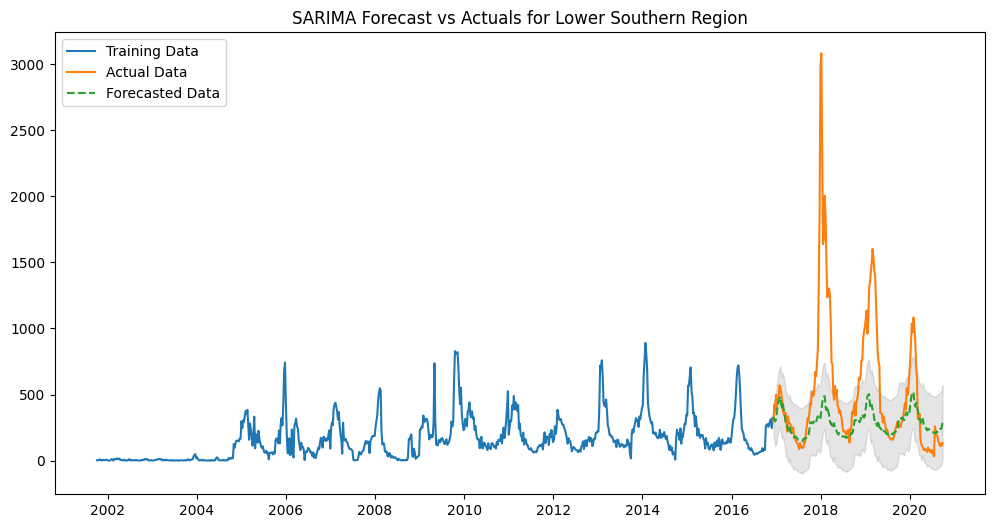

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import statsmodels.api as sm

# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/data/flu-ili-byregion-fluseason_data.csv')

# Convert weekending to datetime format
df['weekending'] = pd.to_datetime(df['weekending'], format='%m/%d/%y')

# Filter data for Upper Southern region
df_lower_southern = df[df['region'] == 'Lower Southern'][['weekending', 'Total_ILI']].rename(columns={'weekending': 'ds', 'Total_ILI': 'y'})

# Split data into training and test sets
train_size = int(len(df_lower_southern) * 0.8)
train_df = df_lower_southern[:train_size]
test_df = df_lower_southern[train_size:]

# Fit SARIMA model on training data
sarima_model = SARIMAX(train_df['y'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 52))
sarima_result = sarima_model.fit(disp=False)

# Forecast on the test set
forecast = sarima_result.get_forecast(steps=len(test_df))
forecast_df = forecast.conf_int()
forecast_df['yhat'] = forecast.predicted_mean
forecast_df['y'] = test_df['y'].values

# Calculate error metrics
mae = mean_absolute_error(test_df['y'], forecast_df['yhat'])
mse = mean_squared_error(test_df['y'], forecast_df['yhat'])
rmse = np.sqrt(mse)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

# Plotting forecast vs actuals
plt.figure(figsize=(12, 6))
plt.plot(train_df['ds'], train_df['y'], label='Training Data')
plt.plot(test_df['ds'], test_df['y'], label='Actual Data')
plt.plot(test_df['ds'], forecast_df['yhat'], label='Forecasted Data', linestyle='--')
plt.fill_between(test_df['ds'], forecast_df['lower y'], forecast_df['upper y'], color='k', alpha=0.1)
plt.title('SARIMA Forecast vs Actuals for Lower Southern Region')
plt.legend()
plt.show()

# Check for Stationarity
- Plot the Time Series:

  - Visual inspection can give a quick idea about trends and seasonality, which indicate non-stationarity.

- Rolling Statistics:

  - Plot the rolling mean and variance to see if they remain constant over time.

- Augmented Dickey-Fuller (ADF) Test:

  - A statistical test to formally check for stationarity.

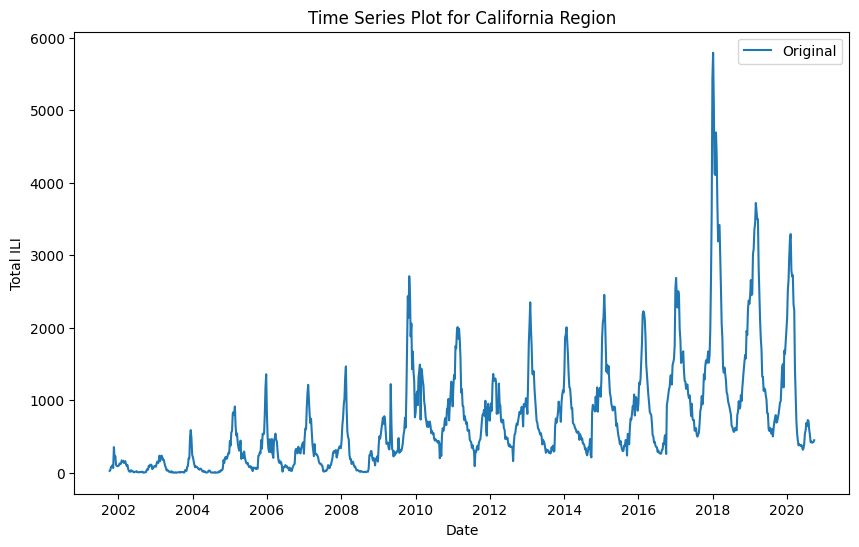

In [26]:
# Load and Plot the Time Series
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# Suppress warningsupper_southern
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/data/flu-ili-byregion-fluseason_data.csv')
df['weekending'] = pd.to_datetime(df['weekending'])
df.set_index('weekending', inplace=True)

# Example data for the California region
region_data_california = df[df['region'] == 'California']['Total_ILI']

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(region_data_california, label='Original')
plt.title('Time Series Plot for California Region')
plt.xlabel('Date')
plt.ylabel('Total ILI')
plt.legend()
plt.show()


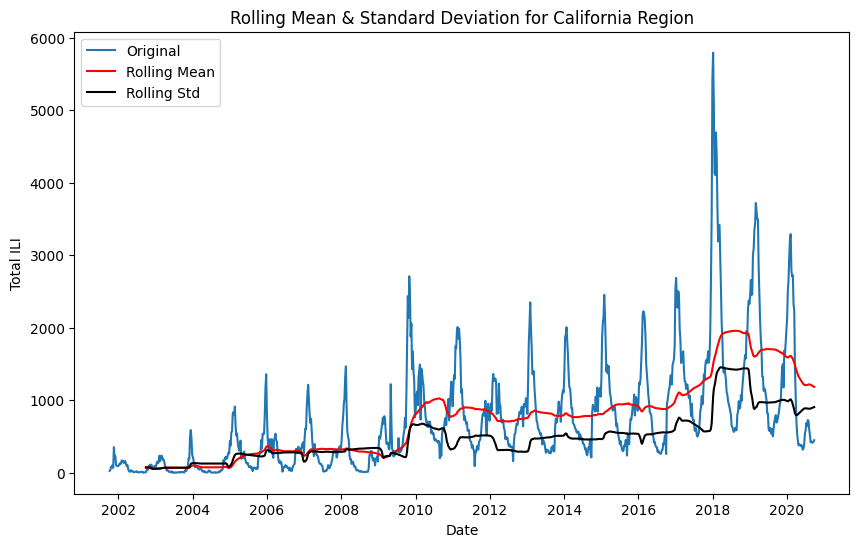

In [27]:
# Plot Rolling Statistics
# Calculate rolling statistics
rolling_mean = region_data_california.rolling(window=52).mean()
rolling_std = region_data_california.rolling(window=52).std()

# Plot rolling statistics
plt.figure(figsize=(10, 6))
plt.plot(region_data_california, label='Original')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='black', label='Rolling Std')
plt.title('Rolling Mean & Standard Deviation for California Region')
plt.xlabel('Date')
plt.ylabel('Total ILI')
plt.legend()
plt.show()

The plot of rolling statistics is used to assess the stationarity of a time series. Stationarity is a crucial property for time series analysis and modeling, particularly for models like ARIMA and SARIMA, which assume that the underlying time series data is stationary.

In [28]:
# Perform Augmented Dickey-Fuller (ADF) Test
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
adf_result = adfuller(region_data_california)

# Print ADF test results
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpretation
if adf_result[1] <= 0.05:
    print("The time series is stationary")
else:
    print("The time series is non-stationary")

ADF Statistic: -5.416266
p-value: 0.000003
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568
The time series is stationary


The ADF test is a statistical test used to check for the presence of unit roots in a time series, which is an indicator of non-stationarity. The null hypothesis of the ADF test is that the time series has a unit root (i.e., it is non-stationary).

Given the ADF statistic of -5.416266, which is less than all the critical values, and a p-value of 0.000003, which is much smaller than 0.05, we reject the null hypothesis. This indicates that the time series does not have a unit root and is considered stationary according to the ADF test.

**Conclusion**

The ADF test results suggest that the time series is stationary in terms of its trend component, but the rolling statistics plot indicates that there may still be issues with changing variance or level that the ADF test does not fully capture.

In [29]:
print(df_california.columns)

Index(['ds', 'y'], dtype='object')


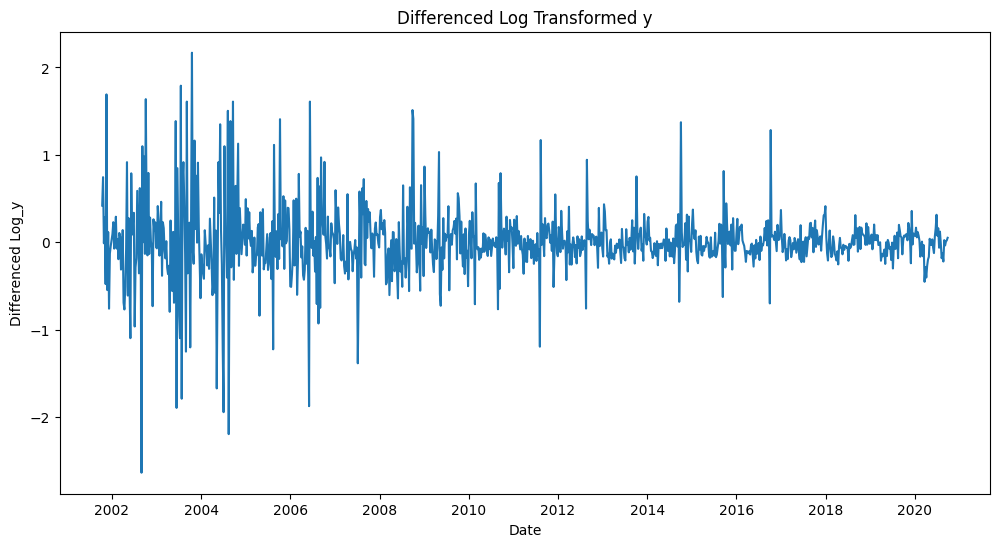

ADF Statistic: -8.7554736448495
p-value: 2.7629770651245236e-14
   1%: -3.437137538234527
   5%: -2.8645366106945414
   10%: -2.568365556798649


In [30]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Log transformation
df_california['Log_y'] = np.log(df_california['y'])

# Handling -inf, inf, and NaN values resulting from log transformation
df_california.replace([np.inf, -np.inf], np.nan, inplace=True)
df_california.dropna(subset=['Log_y'], inplace=True)

# Differencing
df_california['Diff_Log_y'] = df_california['Log_y'].diff()

# Dropping NaNs created by differencing
df_california.dropna(subset=['Diff_Log_y'], inplace=True)

# Plotting the transformed series
plt.figure(figsize=(12, 6))
plt.plot(df_california['ds'], df_california['Diff_Log_y'])
plt.title('Differenced Log Transformed y')
plt.xlabel('Date')
plt.ylabel('Differenced Log_y')
plt.show()

# ADF test on transformed series
result = adfuller(df_california['Diff_Log_y'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print(f'   {key}: {value}')

**Interpretation:**

1. ADF Statistic: The ADF test statistic is -8.755, which is much lower than the critical values at 1%, 5%, and 10% significance levels.
2. p-value: The p-value is extremely small (2.76e-14), which is far below the typical significance level of 0.05.

Since the ADF statistic is lower than the critical values and the p-value is significantly smaller than 0.05, we can reject the null hypothesis that the time series has a unit root (i.e., it is non-stationary). Therefore, the differenced log-transformed series is stationary.

**Summary:**

- Original Series (with Rolling Statistics): The original series showed non-stationarity as indicated by non-constant rolling mean and rolling standard deviation.
- Transformed Series (with ADF Test): After log transformation and differencing, the ADF test confirms that the transformed series is stationary.

This means that the time series, after appropriate transformations, is now suitable for modeling with time series techniques that assume stationarity, such as ARIMA or other related models.

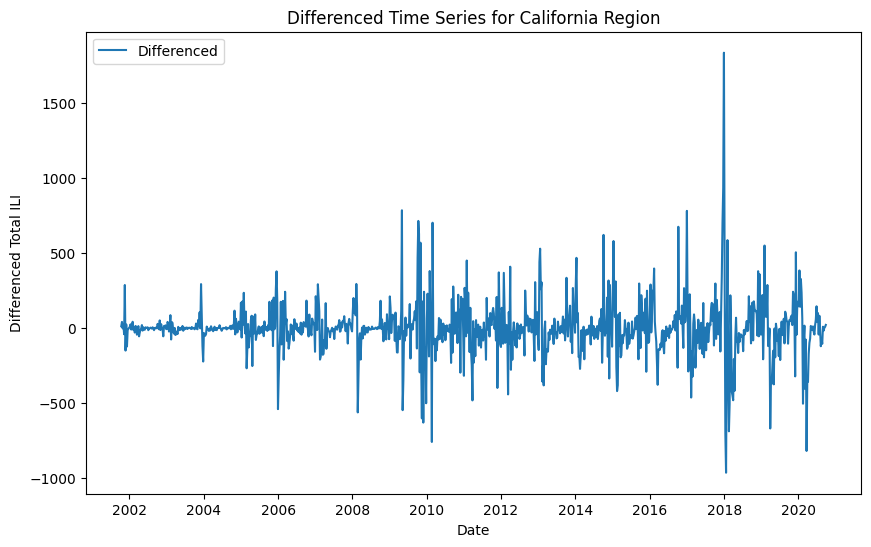

ADF Statistic: -8.719139
p-value: 0.000000
Critical Values:
	1%: -3.437
	5%: -2.865
	10%: -2.568
The differenced time series is stationary


In [31]:
# OR we can test another way to determine the dataset is stationary - Differencing
region_data_diff = region_data_california.diff().dropna()

# Plot differenced data
plt.figure(figsize=(10, 6))
plt.plot(region_data_diff, label='Differenced')
plt.title('Differenced Time Series for California Region')
plt.xlabel('Date')
plt.ylabel('Differenced Total ILI')
plt.legend()
plt.show()

# Perform ADF test on differenced data
adf_result_diff = adfuller(region_data_diff)
print('ADF Statistic: %f' % adf_result_diff[0])
print('p-value: %f' % adf_result_diff[1])
print('Critical Values:')
for key, value in adf_result_diff[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpretation
if adf_result_diff[1] <= 0.05:
    print("The differenced time series is stationary")
else:
    print("The differenced time series is non-stationary")


Since the p-value is significantly less than 0.05 and the ADF Statistic is less than all the critical values, we reject the null hypothesis that the time series is non-stationary. Therefore, the differenced time series is stationary.

# Next Steps: Fit ARIMA/SARIMA Model on Differenced Series
Now that the time series is stationary, we can fit an ARIMA or SARIMA model to this differenced series. Here’s how we can do it:

- Fit SARIMA Model: Use the differenced data to fit a SARIMA model.
- Evaluate Model: Calculate error metrics (MAE, MSE, RMSE) for the model.

**Fit SARIMA Model**

                                     SARIMAX Results                                      
Dep. Variable:                          Total_ILI   No. Observations:                  991
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 52)   Log Likelihood               -6194.518
Date:                            Sun, 19 May 2024   AIC                          12399.036
Time:                                    04:28:20   BIC                          12423.255
Sample:                                10-06-2001   HQIC                         12408.270
                                     - 09-26-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1432      0.135      1.064      0.287      -0.121       0.407
ma.L1         -0.0326      0.139   

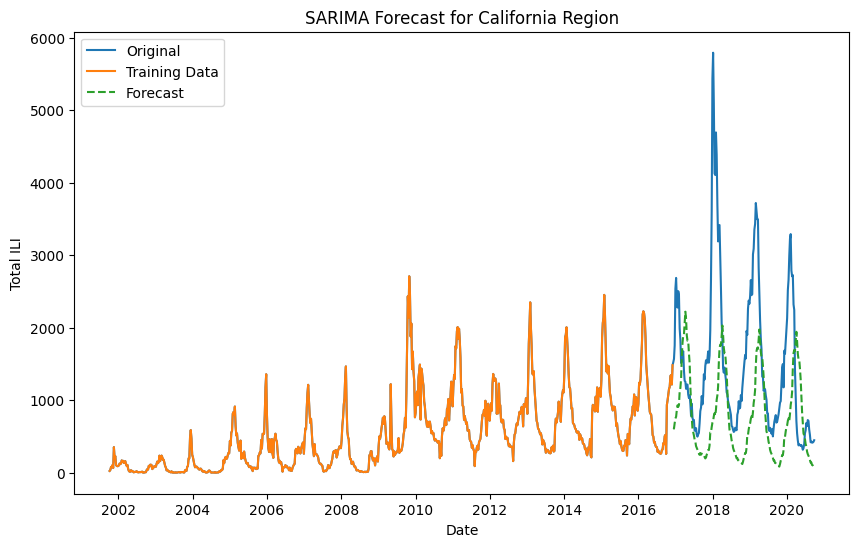

In [32]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Suppress warningsupper_southern
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/data/flu-ili-byregion-fluseason_data.csv')
df['weekending'] = pd.to_datetime(df['weekending'])
df.set_index('weekending', inplace=True)

# Example data for the California region
region_data = df[df['region'] == 'California']['Total_ILI']

# Split the data into training and test sets
train_size = int(len(region_data) * 0.8)
train_data = region_data[:train_size]
test_data = region_data[train_size:]

# Fit SARIMA model on the differenced data
model_sarima = SARIMAX(region_data_california, order=(1, 1, 1), seasonal_order=(1, 1, 1, 52))
model_fit_sarima = model_sarima.fit()
print(model_fit_sarima.summary())

# Make forecasts on the test set
forecast_steps = len(test_data)
forecast_sarima = model_fit_sarima.get_forecast(steps=forecast_steps)
forecast_index = test_data.index
forecast_sarima = forecast_sarima.predicted_mean
forecast_sarima.index = forecast_index

# Calculate error metrics
mae = mean_absolute_error(test_data, forecast_sarima)
mse = mean_squared_error(test_data, forecast_sarima)
rmse = np.sqrt(mse)

# Print error metrics
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

# Plot the original data, training data, and forecast
plt.figure(figsize=(10, 6))
plt.plot(region_data_california, label='Original')
plt.plot(train_data, label='Training Data')
plt.plot(forecast_sarima, label='Forecast', linestyle='--')
plt.title('SARIMA Forecast for California Region')
plt.xlabel('Date')
plt.ylabel('Total ILI')
plt.legend()
plt.show()

# *We can apply the same code to run for other regions*

# Model Diagnostics
Examine the residuals of the model to ensure they resemble white noise.

The model diagnostics plots provide valuable insights into the performance and appropriateness of the SARIMA model. Let's interpret each of the plots:

**1. Standardized Residual Plot**

- Plot Description: This plot shows the residuals (differences between the actual and predicted values) over time.
- Interpretation:
  - Residuals should be randomly scattered around zero without any obvious patterns.
  - In the plot, the residuals seem to fluctuate around zero, which is a good sign. However, there are periods, especially around 2008-2010, where the residuals show large deviations. This indicates that the model may not be capturing some underlying patterns or anomalies during these periods.

**2. Histogram Plus Estimated Density**

- Plot Description: This plot shows the distribution of residuals along with a kernel density estimate (KDE) and a normal distribution curve (N(0,1)).
- Interpretation:
  - Ideally, the residuals should follow a normal distribution centered around zero.
  - In the plot, the histogram indicates that the residuals are roughly normally distributed but with some deviations. The KDE (orange line) follows a similar trend to the normal distribution (green line), but there are discrepancies, suggesting the residuals may not be perfectly normal.

**3. Normal Q-Q Plot**

- Plot Description: This plot compares the quantiles of the residuals to the quantiles of a standard normal distribution.
- Interpretation:
  - If the residuals are normally distributed, the points should lie along the red line.
  - In the plot, the points generally follow the red line but deviate at the tails, indicating the presence of some outliers or non-normality in the residuals.

**4. Correlogram (ACF of Residuals)**

- Plot Description: This plot shows the autocorrelation function (ACF) of the residuals.
- Interpretation:
  -For a well-fitted model, the residuals should show no significant autocorrelation. Most of the autocorrelations should lie within the blue confidence intervals.
  - In the plot, the autocorrelations are mostly within the confidence intervals, suggesting that there is no significant autocorrelation in the residuals. This indicates that the SARIMA model has successfully captured the temporal dependencies in the data.

**Recommendations**

- Address Anomalies and Outliers: The presence of large deviations in residuals during certain periods (e.g., around 2008-2010) suggests that there may be anomalies or outliers that the model is not capturing. Investigate these periods to understand the underlying causes and consider incorporating additional explanatory variables or using more robust modeling techniques.
- Further Model Tuning: Continue refining the SARIMA model parameters to improve the fit. Consider using automated tools like pmdarima for parameter selection.
- Non-Normal Residuals: Although the residuals are roughly normally distributed, there are some deviations. Consider using transformations (e.g., log transformation) to stabilize variance or applying a different error distribution if the normality assumption is critical.
- Additional Diagnostics: Perform additional diagnostic tests, such as the Ljung-Box test, to statistically assess the autocorrelation of residuals.

**Conclusion**

The SARIMA model shows a reasonable fit with residuals centered around zero and no significant autocorrelation. However, there are some deviations from normality and large residuals during certain periods, indicating room for improvement. Further investigation and model tuning can help address these issues and improve the forecast accuracy.

# The code below is to view the error values in table view for ARIMA method

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Suppress warningsupper_southern
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/data/flu-ili-byregion-fluseason_data.csv')

# Convert weekending to datetime format
df['weekending'] = pd.to_datetime(df['weekending'])

# Set the index to weekending
df.set_index('weekending', inplace=True)

# Filter data for each region
regions = df['region'].unique()
region_data = {region: df[df['region'] == region]['Total_ILI'] for region in regions}

# Function to fit ARIMA model and forecast
def fit_arima_forecast(data, order=(1,1,1), steps=260):
    train_size = int(len(data) * 0.8)
    train, test = data[:train_size], data[train_size:]

    # Fit the model
    model = ARIMA(train, order=order)
    model_fit = model.fit()

    # Forecast
    forecast = model_fit.forecast(steps=len(test))

    # Calculate error metrics
    mae = mean_absolute_error(test, forecast)
    mse = mean_squared_error(test, forecast)
    rmse = np.sqrt(mse)

    # Full forecast
    full_forecast = model_fit.forecast(steps=steps)

    return full_forecast, mae, mse, rmse

# Apply ARIMA to each region
arima_order = (1, 1, 1)  # Example order, you might want to tune this

forecasts = {}
error_metrics = {}
for region, data in region_data.items():
    full_forecast, mae, mse, rmse = fit_arima_forecast(data, order=arima_order)
    forecasts[region] = full_forecast
    error_metrics[region] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse}

# Create a list to store the data for each region
results = []

# Loop through each region and gather the error metrics
for region in error_metrics:
    mae = error_metrics[region]['MAE']
    mse = error_metrics[region]['MSE']
    rmse = error_metrics[region]['RMSE']
    results.append([region, mae, mse, rmse])

# Create a DataFrame from the results list
results_df = pd.DataFrame(results, columns=['Region', 'MAE', 'MSE', 'RMSE'])

# Display the DataFrame
print("ARIMA Error Metrics (1,1,1)")
print(results_df)

# Optionally, you can save the DataFrame to a CSV file
#results_df.to_csv('forecast_error_metrics.csv', index=False)

ARIMA Error Metrics (1,1,1)
           Region         MAE           MSE         RMSE
0        Bay Area  233.437133  7.955775e+04   282.059839
1      California  835.261021  1.160572e+06  1077.298485
2         Central  156.439069  2.916864e+04   170.788279
3  Lower Southern  331.968000  2.993404e+05   547.120129
4        Northern  162.534152  5.410056e+04   232.595268
5  Upper Southern   37.725074  1.989715e+03    44.606221


# Calculate and retrieve Error Metrics for NeuralProphet Methodology

In [34]:
!pip install neuralprophet plotly pandas

In [35]:
# Load and Preprocess the Data
# Load the dataset and preprocess it to fit the format required by NeuralProphet.
import pandas as pd
import numpy as np
from neuralprophet import NeuralProphet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Suppress warningsupper_southern
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/data/flu-ili-byregion-fluseason_data.csv')

# Convert weekending to datetime format with specified format
df['weekending'] = pd.to_datetime(df['weekending'], format='%m/%d/%y')

# Prepare data for NeuralProphet
df.rename(columns={'weekending': 'ds', 'Total_ILI': 'y'}, inplace=True)

# Initialize NeuralProphet model
model = NeuralProphet()

# Create a dictionary to store forecasts and error metrics
forecasts = {}
error_metrics = {}

ERROR:NP.plotly:Importing plotly failed. Interactive plots will not work.
ERROR:NP.plotly:Importing plotly failed. Interactive plots will not work.


In [36]:
# Suppress warningsupper_southern
warnings.filterwarnings('ignore')

# Loop through each region and fit the model
regions = df['region'].unique()
for region in regions:
    region_df = df[df['region'] == region][['ds', 'y']]

    # Initialize NeuralProphet model for each region
    model = NeuralProphet()

    # Train the model
    model.fit(region_df, freq='W')

    # Make future dataframe for forecasting
    future = model.make_future_dataframe(region_df, periods=260)

    # Forecast
    forecast = model.predict(future)

    # Calculate error metrics
    train_size = int(len(region_df) * 0.8)
    train_df = region_df[:train_size]
    test_df = region_df[train_size:]

    forecast_train = model.predict(model.make_future_dataframe(train_df, periods=len(test_df)))
    mae = mean_absolute_error(test_df['y'], forecast_train['yhat1'].iloc[-len(test_df):])
    mse = mean_squared_error(test_df['y'], forecast_train['yhat1'].iloc[-len(test_df):])
    rmse = np.sqrt(mse)

    # Store results
    forecasts[region] = forecast
    error_metrics[region] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse}

# Create a list to store the data for each region
results = []

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.899% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.899% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO:NP.utils:Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with

Finding best initial lr:   0%|          | 0/225 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.899% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.899% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.615% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.615% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.615% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.615% of the data.
INFO - (NP.df_utils._infer_frequency

Predicting: 31it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.874% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.874% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.497% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.497% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 9

Predicting: 31it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.899% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.899% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO:NP.utils:Disabling weekly seasonality. Run NeuralProphet with weekl

Finding best initial lr:   0%|          | 0/225 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.899% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.899% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.615% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.615% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.615% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.615% of the data.
INFO - (NP.df_utils._infer_frequency

Predicting: 31it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.874% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.874% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.497% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.497% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 9

Predicting: 31it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.899% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.899% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO:NP.utils:Disabling weekly seasonality. Run NeuralProphet with weekl

Finding best initial lr:   0%|          | 0/225 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.899% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.899% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.615% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.615% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.615% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.615% of the data.
INFO - (NP.df_utils._infer_frequency

Predicting: 31it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.874% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.874% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.497% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.497% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 9

Predicting: 31it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.899% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.899% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO:NP.utils:Disabling weekly seasonality. Run NeuralProphet with weekl

Finding best initial lr:   0%|          | 0/225 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.899% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.899% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.615% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.615% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.615% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.615% of the data.
INFO - (NP.df_utils._infer_frequency

Predicting: 31it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.874% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.874% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.497% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.497% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 9

Predicting: 31it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.899% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.899% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO:NP.utils:Disabling weekly seasonality. Run NeuralProphet with weekl

Finding best initial lr:   0%|          | 0/225 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.899% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.899% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.615% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.615% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.615% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.615% of the data.
INFO - (NP.df_utils._infer_frequency

Predicting: 31it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.874% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.874% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.497% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.497% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 9

Predicting: 31it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.899% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.899% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO:NP.utils:Disabling weekly seasonality. Run NeuralProphet with weekl

Finding best initial lr:   0%|          | 0/225 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.899% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.899% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.615% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.615% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.615% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.615% of the data.
INFO - (NP.df_utils._infer_frequency

Predicting: 31it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.874% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.874% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.497% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.497% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 9

Predicting: 31it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


In [37]:
region_df.head(2)

ds  y
5  2001-10-06  0
11 2001-10-13  6

In [38]:
# Loop through each region and gather the error metrics
for region in error_metrics:
    mae = error_metrics[region]['MAE']
    mse = error_metrics[region]['MSE']
    rmse = error_metrics[region]['RMSE']
    results.append([region, mae, mse, rmse])

# Create a DataFrame from the results list
results_df = pd.DataFrame(results, columns=['Region', 'MAE', 'MSE', 'RMSE'])

# Display the DataFrame
print("Neural Prophet Error Metrics")
print(results_df)

# Optionally, you can save the DataFrame to a CSV file
#results_df.to_csv('neuralprophet_forecast_error_metrics.csv', index=False)

Neural Prophet Error Metrics
           Region         MAE            MSE        RMSE
0        Bay Area  130.876528   32421.678165  180.060207
1      California  510.857400  660225.067836  812.542348
2         Central   57.875306    7919.246186   88.990147
3  Lower Southern  267.348585  214344.493255  462.973534
4        Northern  134.138267   38523.006730  196.272787
5  Upper Southern   14.288965     545.934545   23.365242


In [39]:
# Compare with SARIMA Error Metrics:
#            Region         MAE           MSE         RMSE
# 0        Bay Area  263.300648  1.137641e+05   337.289298
# 1      California  810.607284  1.219914e+06  1104.497247
# 2         Central   71.463836  7.973070e+03    89.292046
# 3  Lower Southern  318.253570  1.937494e+05   440.169694
# 4        Northern  198.461363  8.850728e+04   297.501738
# 5  Upper Southern   32.398326  2.476399e+03    49.763434

# Re-code for showing plotly plot

In [40]:
!pip install neuralprophet plotly pandas

# Data Engineering
**Create each region for each individual dataset**

In [41]:
df = pd.read_csv('/content/drive/MyDrive/data/flu-ili-byregion-fluseason_data.csv')

In [42]:
# Rename the column
df.rename(columns={"weekending": "date"}, inplace=True)

In [43]:
# Set the 'Date' column as the index and specify the frequency as daily
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

In [44]:
df.head(2)

season  date_code      region  Total_ILI  Total_Patients_Seen  \
date                                                                           
2001-10-06  2001-2002     200140    Bay Area          3                  135   
2001-10-06  2001-2002     200140  California         25                 1211   

            Percent_ILI  Number_Providers_Reporting  
date                                                 
2001-10-06         2.22                           2  
2001-10-06         2.06                          14

In [45]:
# Transform the original DataFrame to the desired format
df_transformed = df.groupby(['date', 'region'])['Total_ILI'].sum().unstack(fill_value=0)

# Reset the index and fill NaN values with 0 if needed
df_transformed.reset_index(inplace=True)
df_transformed.fillna(0, inplace=True)

# If you want to rename the columns as shown in your desired format
df_transformed.columns.name = None

# Display the transformed DataFrame
print(df_transformed)

          date  Bay Area  California  Central  Lower Southern  Northern  \
0   2001-10-06         3          25        0               2        20   
1   2001-10-13         3          38        0               3        26   
2   2001-10-20        21          80        0               3        23   
3   2001-10-27        24          79        0               8        32   
4   2001-11-03        52         105        0               5        33   
..         ...       ...         ...      ...             ...       ...   
986 2020-08-29       160         430        0             131       136   
987 2020-09-05       152         414        0             110       146   
988 2020-09-12       161         417        0             129       121   
989 2020-09-19       189         426        0             111       121   
990 2020-09-26       190         448        0             134       122   

     Upper Southern  
0                 0  
1                 6  
2                33  
3          

In [46]:
df_transformed.head(2)

date  Bay Area  California  Central  Lower Southern  Northern  \
0 2001-10-06         3          25        0               2        20   
1 2001-10-13         3          38        0               3        26   

   Upper Southern  
0               0  
1               6

In [47]:
# create sub df for each region
df_california = df_transformed[['date','California']]
df_bay_area = df_transformed[['date','Bay Area']]
df_central = df_transformed[['date','Central']]
df_lower_southern = df_transformed[['date','Lower Southern']]
df_northern = df_transformed[['date','Northern']]
df_upper_southern = df_transformed[['date','Upper Southern']]

In [48]:
# rename columns to ds and y and make it ready for forecast with AR-Net
new_column_names_cal = {'date': 'ds', 'California': 'y'}
new_column_names_bay = {'date': 'ds', 'Bay Area': 'y'}
new_column_names_cen = {'date': 'ds', 'Central': 'y'}
new_column_names_low = {'date': 'ds', 'Lower Southern': 'y'}
new_column_names_nor = {'date': 'ds', 'Northern': 'y'}
new_column_names_upp = {'date': 'ds', 'Upper Southern': 'y'}

In [49]:
df_california.rename(columns=new_column_names_cal, inplace=True)
df_bay_area.rename(columns=new_column_names_bay, inplace=True)
df_central.rename(columns=new_column_names_cen, inplace=True)
df_lower_southern.rename(columns=new_column_names_low, inplace=True)
df_northern.rename(columns=new_column_names_nor, inplace=True)
df_upper_southern.rename(columns=new_column_names_upp, inplace=True)

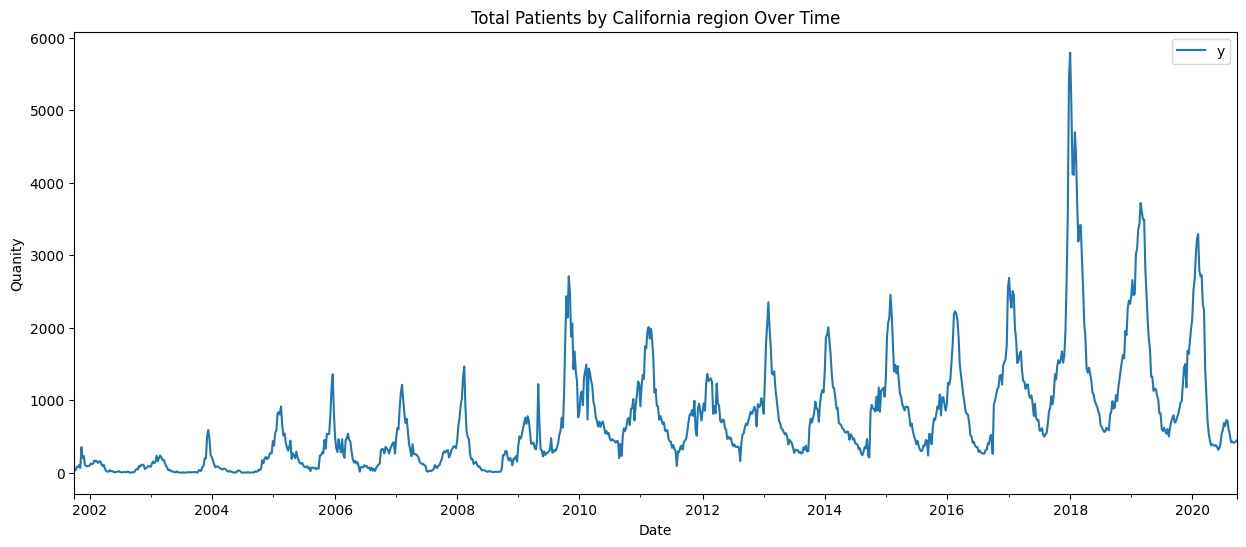

In [50]:
# visualize the California data
ax = df_california.set_index('ds').plot(figsize=(15, 6))
ax.title.set_text('Total Patients by California region Over Time')
ax.set_ylabel('Quanity')
ax.set_xlabel('Date')

plt.show()

In [51]:
def accuracy(obs, pred):
    """
    Calculate accuracy measures

    :param obs: pd.Series of observed values
    :param pred: pd.Series of forecasted values
    :return: dict with accuracy measures
    """

    obs, pred = np.array(obs.dropna()), np.array(pred.dropna())

    assert len(obs) == len(pred), f'accuracy(): obs len is {len(obs)} but preds len is {len(pred)}'

    rmse = np.sqrt(np.mean((obs - pred)**2))
    mape = np.mean(np.abs((obs - pred) / obs))

    return (rmse, mape)

In [52]:
# base code from docs on NeuralProphet
def fit_neural(df, params=None):
    """
    FIt NeuralProphet and return key objects.
    """

    # fit
    m = NeuralProphet(**params) if params is not None else NeuralProphet()
    metrics = m.fit(df, freq="D")

    df_future = m.make_future_dataframe(df, periods=365)
    forecast = m.predict(df_future, raw=True, decompose=False) if params is not None else m.predict(df_future)

    if params is None:
        fig_forecast = m.plot(forecast)
        fig_components = m.plot_components(forecast)
        fig_params = m.plot_parameters()

        return (m, forecast, fig_forecast, fig_components, fig_params)

    else:
        return (None, forecast, None, None)

In [53]:
def eval_neural(df):
    """
    Perform cross validation on our model.
    IMPORTANT: this is correct eval method according to the docs, but differs from Prophet
               so I built a custom function.
    """

    # setup k fold CV
    METRICS = ['SmoothL1Loss', 'MAE', 'RMSE']

    folds = NeuralProphet().crossvalidation_split_df(df, freq="D", k=5, fold_pct=0.20, fold_overlap_pct=0.5)

    # return dfs
    metrics_train = pd.DataFrame(columns=METRICS)
    metrics_test = pd.DataFrame(columns=METRICS)

    # CV
    for df_train, df_test in folds:
        m = NeuralProphet()
        train = m.fit(df=df_train, freq="D")
        test = m.test(df=df_test)
        metrics_train = metrics_train.append(train[METRICS].iloc[-1])
        metrics_test = metrics_test.append(test[METRICS].iloc[-1])

    return (metrics_train, metrics_test)

In [54]:
def cv_run_both_models(df, neural_params):
    """
    Create a CV dataset and run both models and return accuracies. Note that both models
    have their own eval methods, but they differ so I built a custom func that does the
    same thing.

    :param df: pd.DataFrame of Prophet-specified format
    :param neural_params: dict of params to be passed to NeuralProphet
    :return: tuple of training accuracies
    """

    # create train test splits (test = 365 days, train = all prior data, increment = 180 days)
    train_test_split_indices = list(range(365*2, len(df.index) - 365, 180))
    train_test_splits = [(df.iloc[:i, :], df.iloc[i:(i+365), :]) for i in train_test_split_indices]

    rmse_p, mape_p = [], []
    rmse_n, mape_n = [], []
    n_training_days = []

    # loop through train/test splits
    for x in train_test_splits:
        train, test = x
        n_training_days.append(len(train.index))

        # train Prophet and get accuracy
        _, forecast, *_ = fit_prophet(train)
        rmse, mape = accuracy(test['y'], forecast.loc[test['y'].index, 'yhat'])
        rmse_p.append(rmse)
        mape_p.append(mape)

        # train NeuralProphet and get accuracy
        _, forecast, *_ = fit_neural(train, neural_params)
        rmse, mape = accuracy(test['y'], pd.Series(np.array(forecast.iloc[:, 1:]).flatten()))
        rmse_n.append(rmse)
        mape_n.append(mape)

    return pd.DataFrame(dict(
        n_training_days=n_training_days,
        prophet_RMSE=rmse_p,
        neural_RMSE=rmse_n,
        prophet_MAPE=mape_p,
        neural_MAPE=mape_n
    ))

# **FB PROPHET MODEL IMPLEMENTATION**
Install the required dependencies

In [55]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly, plot_cross_validation_metric
from prophet.diagnostics import performance_metrics, cross_validation

We fit the model by instantiating a new Prophet object. Any settings to the forecasting procedure are passed into the constructor. Then we call its fit method and pass in the historical dataframe. Fitting should take 1-5 seconds.

# All California Plots

In [56]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly, plot_cross_validation_metric
from prophet.diagnostics import performance_metrics, cross_validation
import plotly.io as pio

# Set Plotly renderer for Google Colab (or use 'default' for local Jupyter or other environments)
pio.renderers.default = 'colab'

# Initialize Prophet model
m = Prophet()
m.fit(df_california)

# Create future dataframe for predictions
future = m.make_future_dataframe(periods=1000)

# Make predictions
forecast = m.predict(future)

# Generate Plotly plot and add title
fig1 = plot_plotly(m, forecast)
fig1.update_layout(title_text="Prophet Forecast for California", title_x=0.5)
fig1.show()

# Generate components plot and add title
fig2 = plot_components_plotly(m, forecast)
fig2.update_layout(title_text="Prophet Components for California", title_x=0.5)
fig2.show()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp05hwg854/x6fxg04w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp05hwg854/angnb8a4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5675', 'data', 'file=/tmp/tmp05hwg854/x6fxg04w.json', 'init=/tmp/tmp05hwg854/angnb8a4.json', 'output', 'file=/tmp/tmp05hwg854/prophet_model6aouiqm4/prophet_model-20240519043118.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:31:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:31:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


The predict method will assign each row in future a predicted value which it names yhat. If we pass in historical dates, it will provide an in-sample fit. The forecast object here is a new dataframe that includes a column yhat with the forecast, as well as columns for components and uncertainty intervals.

In [57]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds         yhat  yhat_lower   yhat_upper
1986 2023-06-19  1497.999403  888.590026  2098.773187
1987 2023-06-20  1495.589176  907.085149  2040.564247
1988 2023-06-21  1493.002131  925.125229  2088.423315
1989 2023-06-22  1490.225952  881.164328  2083.864504
1990 2023-06-23  1487.255008  893.003863  2105.806152

We plot the forecast by calling the Prophet.plot method and passing in our forecast dataframe.

# Central Region Plots

In [58]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly, plot_cross_validation_metric
from prophet.diagnostics import performance_metrics, cross_validation
import plotly.io as pio

# Set Plotly renderer for Google Colab (or use 'default' for local Jupyter or other environments)
pio.renderers.default = 'colab'

# Initialize Prophet model
m = Prophet()
m.fit(df_central)

# Create future dataframe for predictions
future = m.make_future_dataframe(periods=1000)

# Make predictions
forecast = m.predict(future)

# Generate Plotly plot and add title
fig1 = plot_plotly(m, forecast)
fig1.update_layout(title_text="Prophet Forecast for Central Region", title_x=0.5)
fig1.show()

# Generate components plot and add title
fig2 = plot_components_plotly(m, forecast)
fig2.update_layout(title_text="Prophet Components for Central Region", title_x=0.5)
fig2.show()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp05hwg854/0ixclzac.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp05hwg854/a972pfec.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37244', 'data', 'file=/tmp/tmp05hwg854/0ixclzac.json', 'init=/tmp/tmp05hwg854/a972pfec.json', 'output', 'file=/tmp/tmp05hwg854/prophet_modeljk2rnma0/prophet_model-20240519043120.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:31:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:31:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


# Lower Southern Plots

In [59]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly, plot_cross_validation_metric
from prophet.diagnostics import performance_metrics, cross_validation
import plotly.io as pio

# Set Plotly renderer for Google Colab (or use 'default' for local Jupyter or other environments)
pio.renderers.default = 'colab'

# Initialize Prophet model
m = Prophet()
m.fit(df_lower_southern)

# Create future dataframe for predictions
future = m.make_future_dataframe(periods=1000)

# Make predictions
forecast = m.predict(future)

# Generate Plotly plot and add title
fig1 = plot_plotly(m, forecast)
fig1.update_layout(title_text="Prophet Forecast for Lower Southern Region", title_x=0.5)
fig1.show()

# Generate components plot and add title
fig2 = plot_components_plotly(m, forecast)
fig2.update_layout(title_text="Prophet Components for Lower Southern Region", title_x=0.5)
fig2.show()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp05hwg854/tpvq01dn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp05hwg854/_gsni9jx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65103', 'data', 'file=/tmp/tmp05hwg854/tpvq01dn.json', 'init=/tmp/tmp05hwg854/_gsni9jx.json', 'output', 'file=/tmp/tmp05hwg854/prophet_modelv023_oxq/prophet_model-20240519043121.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:31:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:31:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


# Upper Southern Plots

In [60]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly, plot_cross_validation_metric
from prophet.diagnostics import performance_metrics, cross_validation
import plotly.io as pio

# Set Plotly renderer for Google Colab (or use 'default' for local Jupyter or other environments)
pio.renderers.default = 'colab'

# Initialize Prophet model
m = Prophet()
m.fit(df_upper_southern)

# Create future dataframe for predictions
future = m.make_future_dataframe(periods=1000)

# Make predictions
forecast = m.predict(future)

# Generate Plotly plot and add title
fig1 = plot_plotly(m, forecast)
fig1.update_layout(title_text="Prophet Forecast for Upper Southern Region", title_x=0.5)
fig1.show()

# Generate components plot and add title
fig2 = plot_components_plotly(m, forecast)
fig2.update_layout(title_text="Prophet Components for Upper Southern Region", title_x=0.5)
fig2.show()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp05hwg854/dsjpg4ne.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp05hwg854/3l6kiok3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24249', 'data', 'file=/tmp/tmp05hwg854/dsjpg4ne.json', 'init=/tmp/tmp05hwg854/3l6kiok3.json', 'output', 'file=/tmp/tmp05hwg854/prophet_modelt8p5j9hn/prophet_model-20240519043122.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:31:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:31:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


# Northern Plots

In [61]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly, plot_cross_validation_metric
from prophet.diagnostics import performance_metrics, cross_validation
import plotly.io as pio

# Set Plotly renderer for Google Colab (or use 'default' for local Jupyter or other environments)
pio.renderers.default = 'colab'

# Initialize Prophet model
m = Prophet()
m.fit(df_northern)

# Create future dataframe for predictions
future = m.make_future_dataframe(periods=1000)

# Make predictions
forecast = m.predict(future)

# Generate Plotly plot and add title
fig1 = plot_plotly(m, forecast)
fig1.update_layout(title_text="Prophet Forecast for Northern Region", title_x=0.5)
fig1.show()

# Generate components plot and add title
fig2 = plot_components_plotly(m, forecast)
fig2.update_layout(title_text="Prophet Components for Northern Region", title_x=0.5)
fig2.show()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp05hwg854/46_m9oee.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp05hwg854/pj7nk6cv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55275', 'data', 'file=/tmp/tmp05hwg854/46_m9oee.json', 'init=/tmp/tmp05hwg854/pj7nk6cv.json', 'output', 'file=/tmp/tmp05hwg854/prophet_model0xx28am3/prophet_model-20240519043123.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:31:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:31:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


# Bay Area Plots

In [62]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly, plot_cross_validation_metric
from prophet.diagnostics import performance_metrics, cross_validation
import plotly.io as pio

# Set Plotly renderer for Google Colab (or use 'default' for local Jupyter or other environments)
pio.renderers.default = 'colab'

# Initialize Prophet model
m = Prophet()
m.fit(df_bay_area)

# Create future dataframe for predictions
future = m.make_future_dataframe(periods=1000)

# Make predictions
forecast = m.predict(future)

# Generate Plotly plot and add title
fig1 = plot_plotly(m, forecast)
fig1.update_layout(title_text="Prophet Forecast for Bay Area Region", title_x=0.5)
fig1.show()

# Generate components plot and add title
fig2 = plot_components_plotly(m, forecast)
fig2.update_layout(title_text="Prophet Components for Bay Area Region", title_x=0.5)
fig2.show()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp05hwg854/tuacebiq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp05hwg854/qdqt7jg3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40057', 'data', 'file=/tmp/tmp05hwg854/tuacebiq.json', 'init=/tmp/tmp05hwg854/qdqt7jg3.json', 'output', 'file=/tmp/tmp05hwg854/prophet_modelb95_ghvs/prophet_model-20240519043124.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:31:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:31:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


# Evaluation and Retrieve the Error Metrics from FB Prophet model
1. Split the data into training and testing sets
2. Fit the models
3. Make predictions on the test set
4. Compute MAE, MSE, and RMSE

In [63]:
# Import necessary libraries
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Suppress warningsupper_southern
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/data/flu-ili-byregion-fluseason_data.csv')

# Convert weekending to datetime format
df['weekending'] = pd.to_datetime(df['weekending'], format='%m/%d/%y')

# List of regions
regions = df['region'].unique()

# Dictionary to store error metrics for each region
error_metrics = {}

# Iterate over each region
for region in regions:
    print(f"Processing region: {region}")

    # Filter data for the region
    df_region = df[df['region'] == region][['weekending', 'Total_ILI']].rename(columns={'weekending': 'ds', 'Total_ILI': 'y'})

    # Split data into training and test sets
    train_size = int(len(df_region) * 0.8)
    train_df = df_region[:train_size]
    test_df = df_region[train_size:]

    # Initialize Prophet model
    model = Prophet()

    # Fit the model on the training data
    model.fit(train_df)

    # Make future dataframe for forecasting
    future = model.make_future_dataframe(periods=len(test_df))

    # Make predictions
    forecast = model.predict(future)

    # Calculate error metrics on the test set
    y_true = test_df['y'].values
    y_pred = forecast['yhat'].iloc[-len(test_df):].values

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)

    # Store error metrics in the dictionary
    error_metrics[region] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse}

# Convert error metrics dictionary to DataFrame for better visualization
error_metrics_df = pd.DataFrame.from_dict(error_metrics, orient='index').reset_index().rename(columns={'index': 'Region'})

# Display the error metrics
print("FB Prophet Error Metric")
print(error_metrics_df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp05hwg854/5drxdz7t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp05hwg854/66zu1krn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16584', 'data', 'file=/tmp/tmp05hwg854/5drxdz7t.json', 'init=/tmp/tmp05hwg854/66zu1krn.json', 'output', 'file=/tmp/tmp05hwg854/prophet_modelkdc441t3/prophet_model-20240519043125.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:31:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:31:25 - cmdstanpy - INFO - Chain [1] done processing


Processing region: Bay Area


INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp05hwg854/b068j83g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp05hwg854/0t80gmji.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19017', 'data', 'file=/tmp/tmp05hwg854/b068j83g.json', 'init=/tmp/tmp05hwg854/0t80gmji.json', 'output', 'file=/tmp/tmp05hwg854/prophet_model0ha0dzb2/prophet_model-20240519043126.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:31:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:31:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing

Processing region: California


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp05hwg854/2hdqee53.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp05hwg854/4z_8xgyz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61706', 'data', 'file=/tmp/tmp05hwg854/2hdqee53.json', 'init=/tmp/tmp05hwg854/4z_8xgyz.json', 'output', 'file=/tmp/tmp05hwg854/prophet_modelcgd9tphp/prophet_model-20240519043126.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:31:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:31:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Processing region: Central


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp05hwg854/5xtqk7_c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp05hwg854/tygmf8wo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18093', 'data', 'file=/tmp/tmp05hwg854/5xtqk7_c.json', 'init=/tmp/tmp05hwg854/tygmf8wo.json', 'output', 'file=/tmp/tmp05hwg854/prophet_modelgh9sjx1f/prophet_model-20240519043127.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:31:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:31:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Processing region: Lower Southern


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp05hwg854/wl9sdt2k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp05hwg854/z07k_yzt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74477', 'data', 'file=/tmp/tmp05hwg854/wl9sdt2k.json', 'init=/tmp/tmp05hwg854/z07k_yzt.json', 'output', 'file=/tmp/tmp05hwg854/prophet_modelmwiamlq6/prophet_model-20240519043127.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:31:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing region: Northern


04:31:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp05hwg854/xuxktl2b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp05hwg854/aukfi6f5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33387', 'data', 'file=/tmp/tmp05hwg854/xuxktl2b.json', 'init=/tmp/tmp05hwg854/aukfi6f5.json', 'output', 'file=/tmp/tmp05hwg854/prophet_modelma1ye0va/prophet_model-20240519043127.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:31:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:31:28 - cmdstanpy - INFO - Chain [1] 

Processing region: Upper Southern
FB Prophet Error Metric
           Region         MAE           MSE         RMSE
0        Bay Area  218.172506  7.950090e+04   281.959048
1      California  750.272384  1.232013e+06  1109.961022
2         Central  130.866642  2.037291e+04   142.733700
3  Lower Southern  317.424792  2.933757e+05   541.641703
4        Northern  225.113821  9.958849e+04   315.576439
5  Upper Southern   42.979816  3.133539e+03    55.978026


# Results from Error Metrics for all four models

In [64]:
# ARIMA Error Metrics (1,1,1)
#            Region         MAE           MSE         RMSE
# 0        Bay Area  233.437133  7.955775e+04   282.059839
# 1      California  835.261021  1.160572e+06  1077.298485
# 2         Central  156.439069  2.916864e+04   170.788279
# 3  Lower Southern  331.968000  2.993404e+05   547.120129
# 4        Northern  162.534152  5.410056e+04   232.595268
# 5  Upper Southern   37.725074  1.989715e+03    44.606221

# SARIMA Model Error Metrics (1,1,1) (1,1,1,52)
#            Region         MAE            MSE        RMSE
# 0        Bay Area  150.367789   40715.911967  201.781843
# 1      California  597.267509  743163.535432  862.069333
# 2         Central  134.974681   26414.526326  162.525464
# 3  Lower Southern  295.177445  269819.768918  519.441786
# 4        Northern  186.226114   72505.848349  269.269100
# 5  Upper Southern   25.942423     953.018739   30.871002

# FB Prophet Error Metrics
#            Region         MAE           MSE         RMSE
# 0        Bay Area  218.172506  7.950090e+04   281.959048
# 1      California  750.272384  1.232013e+06  1109.961022
# 2         Central  130.866642  2.037291e+04   142.733700
# 3  Lower Southern  317.424792  2.933757e+05   541.641703
# 4        Northern  225.113821  9.958849e+04   315.576439
# 5  Upper Southern   42.979816  3.133539e+03    55.978026

# Neural Prophet Error Metrics
#            Region         MAE            MSE        RMSE
# 0        Bay Area  130.141777   32032.757508  178.976975
# 1      California  510.602257  659868.826742  812.323105
# 2         Central   57.877026    7901.860650   88.892411
# 3  Lower Southern  267.706995  214103.172520  462.712840
# 4        Northern  134.098694   38424.275419  196.021110
# 5  Upper Southern   14.318081     552.871223   23.513214

# *Based on the MAE, MSE, and RMSE: The best performance model is Neural Prophet*

# **NEURAL PROPHET MODEL IMPLEMENTATION**

In [65]:
!pip install neuralprophet plotly

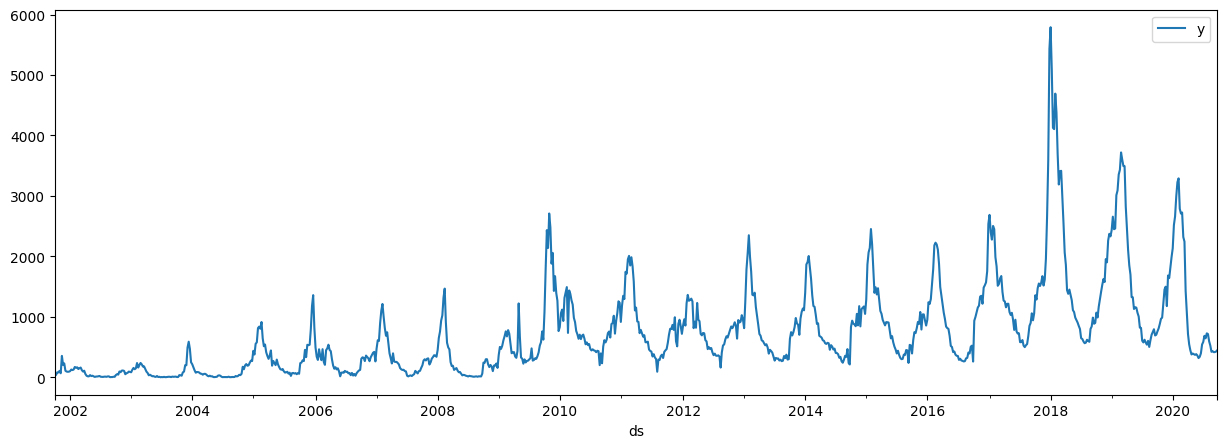

In [66]:
# Load the dataset from the CSV file using pandas
#df = pd.read_csv("...")
# Plot the dataset, showing price (y column) over time (ds column)
plt = df_california.plot(x="ds", y="y", figsize=(15, 5))

Note: Whenever we use a dataset with NeuralProphet, it must be a pandas dataframe with the following format and properties:

Time series column must be named "ds" and contain datetime values.
Value column must be named "y" and contain float values.

**Set up the model**

In [67]:
# Import the NeuralProphet class
from neuralprophet import NeuralProphet, set_log_level

# Disable logging messages unless there is an error
set_log_level("ERROR")

# Create a NeuralProphet model with default parameters
m = NeuralProphet()
# Use static plotly in notebooks
m.set_plotting_backend("plotly-static")

# Fit the model on the dataset (this might take a bit)
metrics = m.fit(df_california)

Finding best initial lr:   0%|          | 0/225 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

**Forecast the future of the next 4 years - Testing with review on pltly plot**

To predict future values we have to extend our dataframe. In our California df we want to create a forecast of the next 4 years (meaning 204 weeks). Then we have to run the prediction again on the extended dataframe.

In [68]:
# Install kaleido
!pip install -U kaleido plotly

In [69]:
# Create a new dataframe reaching 204 (4 years) into the future for our forecast, n_historic_predictions also shows historic data
df_future_california = m.make_future_dataframe(df_california, n_historic_predictions=True, periods=208)

# Predict the future
forecast = m.predict(df_future_california)

Predicting: 31it [00:00, ?it/s]

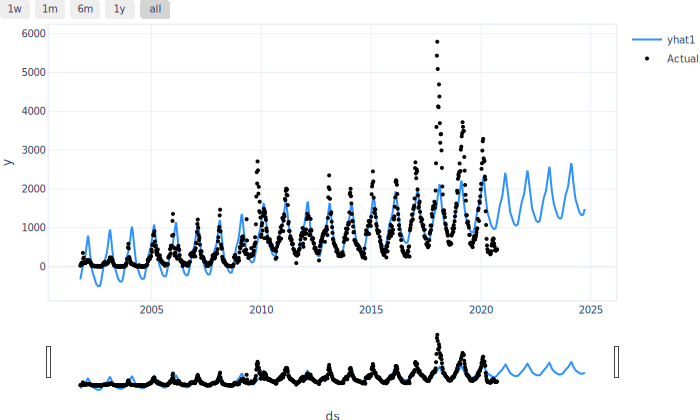

In [70]:
# Visualize the forecast
m.plot(forecast)

In [80]:
# NeuralProphet // forecast for California
import pandas as pd
from neuralprophet import NeuralProphet
import plotly.graph_objs as go
import plotly.io as pio

# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/data/flu-ili-byregion-fluseason_data.csv')

# Convert weekending to datetime format and filter for California region
df['ds'] = pd.to_datetime(df['weekending'], format='%m/%d/%y')
df = df[df['region'] == 'California'][['ds', 'Total_ILI']].rename(columns={'Total_ILI': 'y'})

# Initialize NeuralProphet model
m = NeuralProphet()

# Fit the model on the dataset
metrics = m.fit(df, freq='W')

# Create future dataframe and make predictions
future = m.make_future_dataframe(df, periods=208)
forecast = m.predict(future)

# Check the forecast dataframe columns
print(forecast.columns)

# Create custom Plotly plot
fig = go.Figure()

# Add original data to the plot
fig.add_trace(go.Scatter(x=df['ds'], y=df['y'], mode='lines', name='Original Data'))

# Add forecast data to the plot
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat1'], mode='lines', name='Forecast'))

# Add confidence intervals to the plot if available
if 'yhat1_upper' in forecast.columns and 'yhat1_lower' in forecast.columns:
    fig.add_trace(go.Scatter(
        x=forecast['ds'],
        y=forecast['yhat1_upper'],
        mode='lines',
        name='Upper Confidence Interval',
        line=dict(width=0),
        showlegend=False
    ))
    fig.add_trace(go.Scatter(
        x=forecast['ds'],
        y=forecast['yhat1_lower'],
        mode='lines',
        name='Lower Confidence Interval',
        line=dict(width=0),
        fill='tonexty',
        fillcolor='rgba(0,100,80,0.2)',
        showlegend=False
    ))


Finding best initial lr:   0%|          | 0/225 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 31it [00:00, ?it/s]

Index(['ds', 'y', 'yhat1', 'trend', 'season_yearly'], dtype='object')


In [81]:
# Visualize the plot
fig.update_layout(
    title="NeuralProphet Forecast for California Region",
    title_x=0.5,
    xaxis_title='Date',
    yaxis_title='Total ILI'
)

# Show the plot
fig.show()

In [82]:
# NeuralProphet // forecast for Bay Area region
import pandas as pd
from neuralprophet import NeuralProphet
import plotly.graph_objs as go
import plotly.io as pio

# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/data/flu-ili-byregion-fluseason_data.csv')

# Convert weekending to datetime format and filter for Bay Area region
df['ds'] = pd.to_datetime(df['weekending'], format='%m/%d/%y')
df = df[df['region'] == 'Bay Area'][['ds', 'Total_ILI']].rename(columns={'Total_ILI': 'y'})

# Initialize NeuralProphet model
m = NeuralProphet()

# Fit the model on the dataset
metrics = m.fit(df, freq='W')

# Create future dataframe and make predictions
future = m.make_future_dataframe(df, periods=208)
forecast = m.predict(future)

# Check the forecast dataframe columns
print(forecast.columns)

# Create custom Plotly plot
fig = go.Figure()

# Add original data to the plot
fig.add_trace(go.Scatter(x=df['ds'], y=df['y'], mode='lines', name='Original Data'))

# Add forecast data to the plot
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat1'], mode='lines', name='Forecast'))

# Add confidence intervals to the plot if available
if 'yhat1_upper' in forecast.columns and 'yhat1_lower' in forecast.columns:
    fig.add_trace(go.Scatter(
        x=forecast['ds'],
        y=forecast['yhat1_upper'],
        mode='lines',
        name='Upper Confidence Interval',
        line=dict(width=0),
        showlegend=False
    ))
    fig.add_trace(go.Scatter(
        x=forecast['ds'],
        y=forecast['yhat1_lower'],
        mode='lines',
        name='Lower Confidence Interval',
        line=dict(width=0),
        fill='tonexty',
        fillcolor='rgba(0,100,80,0.2)',
        showlegend=False
    ))

Finding best initial lr:   0%|          | 0/225 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 31it [00:00, ?it/s]

Index(['ds', 'y', 'yhat1', 'trend', 'season_yearly'], dtype='object')


In [83]:
# Visualize the plot
fig.update_layout(
    title="NeuralProphet Forecast for Bay Area Region",
    title_x=0.5,
    xaxis_title='Date',
    yaxis_title='Total ILI'
)

# Show the plot
fig.show()

In [84]:
# NeuralProphet // forecast for Northern region
import pandas as pd
from neuralprophet import NeuralProphet
import plotly.graph_objs as go
import plotly.io as pio

# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/data/flu-ili-byregion-fluseason_data.csv')

# Convert weekending to datetime format and filter for Northern region
df['ds'] = pd.to_datetime(df['weekending'], format='%m/%d/%y')
df = df[df['region'] == 'Northern'][['ds', 'Total_ILI']].rename(columns={'Total_ILI': 'y'})

# Initialize NeuralProphet model
m = NeuralProphet()

# Fit the model on the dataset
metrics = m.fit(df, freq='W')

# Create future dataframe and make predictions
future = m.make_future_dataframe(df, periods=208)
forecast = m.predict(future)

# Check the forecast dataframe columns
print(forecast.columns)

# Create custom Plotly plot
fig = go.Figure()

# Add original data to the plot
fig.add_trace(go.Scatter(x=df['ds'], y=df['y'], mode='lines', name='Original Data'))

# Add forecast data to the plot
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat1'], mode='lines', name='Forecast'))

# Add confidence intervals to the plot if available
if 'yhat1_upper' in forecast.columns and 'yhat1_lower' in forecast.columns:
    fig.add_trace(go.Scatter(
        x=forecast['ds'],
        y=forecast['yhat1_upper'],
        mode='lines',
        name='Upper Confidence Interval',
        line=dict(width=0),
        showlegend=False
    ))
    fig.add_trace(go.Scatter(
        x=forecast['ds'],
        y=forecast['yhat1_lower'],
        mode='lines',
        name='Lower Confidence Interval',
        line=dict(width=0),
        fill='tonexty',
        fillcolor='rgba(0,100,80,0.2)',
        showlegend=False
    ))

Finding best initial lr:   0%|          | 0/225 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 31it [00:00, ?it/s]

Index(['ds', 'y', 'yhat1', 'trend', 'season_yearly'], dtype='object')


In [85]:
# Visualize the plot for Northern region
fig.update_layout(
    title="NeuralProphet Forecast for Northern region",
    title_x=0.5,
    xaxis_title='Date',
    yaxis_title='Total ILI'
)

# Show the plot
fig.show()

**Interpret the results of Forecast the Northern region**

**Key Elements of the Plot**

- Original Data (Blue Line): The blue line represents the actual historical data for the Northern region's Total ILI (Influenza-Like Illnesses) from the past years. This data is used by the model to learn the underlying patterns and trends.

- Forecast (Red Line): The red line represents the forecasted Total ILI values for future dates. The NeuralProphet model has predicted these values based on the historical data provided.

**Interpretation**

- Historical Data (Blue Line): The historical data shows a clear seasonal pattern with peaks and troughs occurring at regular intervals. There are notable spikes, particularly in certain years, indicating high incidences of ILI during those periods.

- Forecasted Data (Red Line):

  - The forecasted values continue the observed seasonal pattern, with periodic peaks and troughs. This indicates that the model has captured the seasonality in the data well.
  - The forecast starts from the point where the historical data ends and extends into the future.

- Trend:

  - The trend in the forecast shows a cyclical pattern with regular intervals of high and low ILI values. This cyclicality is consistent with the historical data, suggesting the model has identified and extended the seasonal trend into the future.

- Comparison with Historical Data:

  - The forecast closely follows the historical pattern but slightly deviates in magnitude. This is expected as forecasting models often introduce some level of smoothing.

**Evaluation and Next Steps**

- Model Evaluation:

  - To quantitatively evaluate the model's performance, calculate error metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) between the actual historical data and the forecasted values (if you have a validation set).

  - Perform cross-validation to further assess the model's accuracy and robustness.

- Confidence Intervals:

  - Consider adding confidence intervals to the forecast to provide a range within which the actual future values are expected to fall. This can help in understanding the uncertainty associated with the predictions.

- Fine-Tuning:

  - Fine-tune the NeuralProphet model parameters to potentially improve the forecast accuracy. This includes adjusting seasonality settings, regularization parameters, and the number of epochs.

- Comparison with Other Models:

  - Compare the forecast results from NeuralProphet with other models like SARIMA, FB Prophet, or other machine learning approaches to ensure you are using the best model for your data.

In [86]:
# NeuralProphet // forecast for Central region
import pandas as pd
from neuralprophet import NeuralProphet
import plotly.graph_objs as go
import plotly.io as pio

# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/data/flu-ili-byregion-fluseason_data.csv')

# Convert weekending to datetime format and filter for Central region
df['ds'] = pd.to_datetime(df['weekending'], format='%m/%d/%y')
df = df[df['region'] == 'Central'][['ds', 'Total_ILI']].rename(columns={'Total_ILI': 'y'})

# Initialize NeuralProphet model
m = NeuralProphet()

# Fit the model on the dataset
metrics = m.fit(df, freq='W')

# Create future dataframe and make predictions
future = m.make_future_dataframe(df, periods=208)
forecast = m.predict(future)

# Check the forecast dataframe columns
print(forecast.columns)

# Create custom Plotly plot
fig = go.Figure()

# Add original data to the plot
fig.add_trace(go.Scatter(x=df['ds'], y=df['y'], mode='lines', name='Original Data'))

# Add forecast data to the plot
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat1'], mode='lines', name='Forecast'))

# Add confidence intervals to the plot if available
if 'yhat1_upper' in forecast.columns and 'yhat1_lower' in forecast.columns:
    fig.add_trace(go.Scatter(
        x=forecast['ds'],
        y=forecast['yhat1_upper'],
        mode='lines',
        name='Upper Confidence Interval',
        line=dict(width=0),
        showlegend=False
    ))
    fig.add_trace(go.Scatter(
        x=forecast['ds'],
        y=forecast['yhat1_lower'],
        mode='lines',
        name='Lower Confidence Interval',
        line=dict(width=0),
        fill='tonexty',
        fillcolor='rgba(0,100,80,0.2)',
        showlegend=False
    ))

Finding best initial lr:   0%|          | 0/225 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 31it [00:00, ?it/s]

Index(['ds', 'y', 'yhat1', 'trend', 'season_yearly'], dtype='object')


In [87]:
# Visualize the plot for Central region
fig.update_layout(
    title="NeuralProphet Forecast for Central region",
    title_x=0.5,
    xaxis_title='Date',
    yaxis_title='Total ILI'
)

# Show the plot
fig.show()

# **Explanation for Negative Values in Forecast**
- Seasonality and Trend:

  - The NeuralProphet model tries to capture seasonality and trend components in the data. In some cases, the model might predict values that are slightly below zero due to the combination of seasonality and trend components, especially when the historical data shows low values during certain periods.

- Model Constraints:

  - NeuralProphet, like many other time series models, does not inherently constrain the forecasted values to be non-negative. If the model predicts values based on the patterns it learned from the historical data, it might sometimes result in negative forecasts.

- Data Characteristics:

  - If the historical data has periods of very low values close to zero, the model might predict negative values when extending the trend into the future. This can happen if the model's seasonal or trend components imply a downward movement.

  # Below is a solution to forecast without negative values to show up, make the forecasting more realistically.

In [88]:
import pandas as pd
from neuralprophet import NeuralProphet
import plotly.graph_objs as go

# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/data/flu-ili-byregion-fluseason_data.csv')
df['ds'] = pd.to_datetime(df['weekending'], format='%m/%d/%y')
df = df[df['region'] == 'Central'][['ds', 'Total_ILI']].rename(columns={'Total_ILI': 'y'})

# Initialize NeuralProphet model
m = NeuralProphet()

# Fit the model on the dataset
metrics = m.fit(df, freq='W')

# Create future dataframe
future = m.make_future_dataframe(df, periods=365)

# Make predictions
forecast = m.predict(future)

# Clip the forecasted values to be non-negative
forecast['yhat1'] = forecast['yhat1'].clip(lower=0)

# Create custom Plotly plot
fig = go.Figure()

# Add original data to the plot
fig.add_trace(go.Scatter(x=df['ds'], y=df['y'], mode='markers', name='Actual Data'))

# Add forecast data to the plot
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat1'], mode='lines', name='Forecast'))

Finding best initial lr:   0%|          | 0/225 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 31it [00:00, ?it/s]

In [89]:
# Update layout with title
fig.update_layout(
    title="NeuralProphet Forecast for Central Region",
    title_x=0.5,
    xaxis_title='Date',
    yaxis_title='Total ILI'
)

# Show the plot
fig.show()

In [90]:
# NeuralProphet // forecast for Central region
import pandas as pd
from neuralprophet import NeuralProphet
import plotly.graph_objs as go
import plotly.io as pio

# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/data/flu-ili-byregion-fluseason_data.csv')

# Convert weekending to datetime format and filter for Central region
df['ds'] = pd.to_datetime(df['weekending'], format='%m/%d/%y')
df = df[df['region'] == 'Central'][['ds', 'Total_ILI']].rename(columns={'Total_ILI': 'y'})

# Initialize NeuralProphet model
m = NeuralProphet()

# Fit the model on the dataset
metrics = m.fit(df, freq='W')

# Create future dataframe and make predictions
future = m.make_future_dataframe(df, periods=208)
forecast = m.predict(future)

# Clip the forecasted values to be non-negative
forecast['yhat1'] = forecast['yhat1'].clip(lower=0)

# Check the forecast dataframe columns
print(forecast.columns)

# Create custom Plotly plot
fig = go.Figure()

# Add original data to the plot
fig.add_trace(go.Scatter(x=df['ds'], y=df['y'], mode='lines', name='Original Data'))

# Add forecast data to the plot
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat1'], mode='lines', name='Forecast'))

# Add confidence intervals to the plot if available
if 'yhat1_upper' in forecast.columns and 'yhat1_lower' in forecast.columns:
    fig.add_trace(go.Scatter(
        x=forecast['ds'],
        y=forecast['yhat1_upper'],
        mode='lines',
        name='Upper Confidence Interval',
        line=dict(width=0),
        showlegend=False
    ))
    fig.add_trace(go.Scatter(
        x=forecast['ds'],
        y=forecast['yhat1_lower'],
        mode='lines',
        name='Lower Confidence Interval',
        line=dict(width=0),
        fill='tonexty',
        fillcolor='rgba(0,100,80,0.2)',
        showlegend=False
    ))

Finding best initial lr:   0%|          | 0/225 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 31it [00:00, ?it/s]

Index(['ds', 'y', 'yhat1', 'trend', 'season_yearly'], dtype='object')


In [91]:
# Visualize the plot for Central region
fig.update_layout(
    title="NeuralProphet Forecast for Central region",
    title_x=0.5,
    xaxis_title='Date',
    yaxis_title='Total ILI'
)

# Show the plot
fig.show()

In [92]:
# NeuralProphet // forecast for Upper Southern region
import pandas as pd
from neuralprophet import NeuralProphet
import plotly.graph_objs as go
import plotly.io as pio

# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/data/flu-ili-byregion-fluseason_data.csv')

# Convert weekending to datetime format and filter for Upper Southern region
df['ds'] = pd.to_datetime(df['weekending'], format='%m/%d/%y')
df = df[df['region'] == 'Upper Southern'][['ds', 'Total_ILI']].rename(columns={'Total_ILI': 'y'})

# Initialize NeuralProphet model
m = NeuralProphet()

# Fit the model on the dataset
metrics = m.fit(df, freq='W')

# Create future dataframe and make predictions
future = m.make_future_dataframe(df, periods=208)
forecast = m.predict(future)

# Check the forecast dataframe columns
print(forecast.columns)

# Create custom Plotly plot
fig = go.Figure()

# Add original data to the plot
fig.add_trace(go.Scatter(x=df['ds'], y=df['y'], mode='lines', name='Original Data'))

# Add forecast data to the plot
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat1'], mode='lines', name='Forecast'))

# Add confidence intervals to the plot if available
if 'yhat1_upper' in forecast.columns and 'yhat1_lower' in forecast.columns:
    fig.add_trace(go.Scatter(
        x=forecast['ds'],
        y=forecast['yhat1_upper'],
        mode='lines',
        name='Upper Confidence Interval',
        line=dict(width=0),
        showlegend=False
    ))
    fig.add_trace(go.Scatter(
        x=forecast['ds'],
        y=forecast['yhat1_lower'],
        mode='lines',
        name='Lower Confidence Interval',
        line=dict(width=0),
        fill='tonexty',
        fillcolor='rgba(0,100,80,0.2)',
        showlegend=False
    ))

Finding best initial lr:   0%|          | 0/225 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 31it [00:00, ?it/s]

Index(['ds', 'y', 'yhat1', 'trend', 'season_yearly'], dtype='object')


In [93]:
# Visualize the plot for Upper Southern region
fig.update_layout(
    title="NeuralProphet Forecast for Upper Southern region",
    title_x=0.5,
    xaxis_title='Date',
    yaxis_title='Total ILI'
)

# Show the plot
fig.show()

In [94]:
# NeuralProphet // forecast for Lower Southern region
import pandas as pd
from neuralprophet import NeuralProphet
import plotly.graph_objs as go
import plotly.io as pio

# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/data/flu-ili-byregion-fluseason_data.csv')

# Convert weekending to datetime format and filter for Lower Southern region
df['ds'] = pd.to_datetime(df['weekending'], format='%m/%d/%y')
df = df[df['region'] == 'Lower Southern'][['ds', 'Total_ILI']].rename(columns={'Total_ILI': 'y'})

# Initialize NeuralProphet model
m = NeuralProphet()

# Fit the model on the dataset
metrics = m.fit(df, freq='W')

# Create future dataframe and make predictions
future = m.make_future_dataframe(df, periods=208)
forecast = m.predict(future)

# Check the forecast dataframe columns
print(forecast.columns)

# Create custom Plotly plot
fig = go.Figure()

# Add original data to the plot
fig.add_trace(go.Scatter(x=df['ds'], y=df['y'], mode='lines', name='Original Data'))

# Add forecast data to the plot
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat1'], mode='lines', name='Forecast'))

# Add confidence intervals to the plot if available
if 'yhat1_upper' in forecast.columns and 'yhat1_lower' in forecast.columns:
    fig.add_trace(go.Scatter(
        x=forecast['ds'],
        y=forecast['yhat1_upper'],
        mode='lines',
        name='Upper Confidence Interval',
        line=dict(width=0),
        showlegend=False
    ))
    fig.add_trace(go.Scatter(
        x=forecast['ds'],
        y=forecast['yhat1_lower'],
        mode='lines',
        name='Lower Confidence Interval',
        line=dict(width=0),
        fill='tonexty',
        fillcolor='rgba(0,100,80,0.2)',
        showlegend=False
    ))

Finding best initial lr:   0%|          | 0/225 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 31it [00:00, ?it/s]

Index(['ds', 'y', 'yhat1', 'trend', 'season_yearly'], dtype='object')


In [95]:
# Visualize the plot for Lower Southern region
fig.update_layout(
    title="NeuralProphet Forecast for Lower Southern region",
    title_x=0.5,
    xaxis_title='Date',
    yaxis_title='Total ILI'
)

# Show the plot
fig.show()

**Key Elements of the Plot**

1. Original Data (Blue Line):

 - The blue line represents the actual historical data for the Lower Southern region's Total ILI (Influenza-Like Illnesses) from past years. This data is used by the model to learn the underlying patterns and trends.

2. Forecasted Data (Red Line):

 - The red line represents the forecasted Total ILI values for future dates. The NeuralProphet model has predicted these values based on the historical data provided.

**Interpretation**

1. Historical Data (Blue Line):

 - The historical data shows a clear seasonal pattern with peaks and troughs occurring at regular intervals. There are notable spikes, particularly in certain years, indicating high incidences of ILI during those periods.
 - The data also exhibits variability, with some years showing higher peaks than others.

2. Forecasted Data (Red Line):

 - The forecasted values continue the observed seasonal pattern, with periodic peaks and troughs. This indicates that the model has captured the seasonality in the data well.
 - The forecast starts from the point where the historical data ends and extends into the future, showing a cyclical pattern with regular intervals of high and low ILI values.

3. Trend:

 - The trend in the forecast shows a cyclical pattern with regular intervals of high and low ILI values. This cyclicality is consistent with the historical data, suggesting the model has identified and extended the seasonal trend into the future.

4. Comparison with Historical Data:

 - The forecast closely follows the historical pattern but slightly deviates in magnitude. This is expected as forecasting models often introduce some level of smoothing.
 - The future forecast appears to have a lower amplitude compared to some of the highest peaks in the historical data. This could be due to the model's inherent smoothing effect or the lack of extreme spikes in the recent historical data.

**Evaluation and Next Steps**

1. Model Evaluation:

 - To quantitatively evaluate the model's performance, calculate error metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) between the actual historical data and the forecasted values (if you have a validation set).
 - Perform cross-validation to further assess the model's accuracy and robustness.

2. Confidence Intervals:

 - Consider adding confidence intervals to the forecast to provide a range within which the actual future values are expected to fall. This can help in understanding the uncertainty associated with the predictions.

3. Fine-Tuning:

 - Fine-tune the NeuralProphet model parameters to potentially improve the forecast accuracy. This includes adjusting seasonality settings, regularization parameters, and the number of epochs.

4. Comparison with Other Models:

 - Compare the forecast results from NeuralProphet with other models like SARIMA, FB Prophet, or other machine learning approaches to ensure you are using the best model for your data.

**Summary**

The plot shows that the NeuralProphet model captures the general seasonality and trend of the Lower Southern region's Total ILI data. The forecast continues the seasonal pattern observed in the historical data, indicating that the model has learned the underlying patterns well. However, further evaluation using error metrics and possibly fine-tuning the model parameters can help improve the forecast accuracy and ensure it aligns closely with the real-world data.

# Add Holidays in to the model

In [96]:
# Create the Holidays DF
import pandas as pd

# Define custom holidays
holidays = pd.DataFrame({
    'ds': pd.to_datetime([
        '2024-01-01', '2024-02-11', '2024-05-27', '2024-07-04', '2024-09-02', '2024-11-28', '2024-12-25', # Example holiday dates
        '2025-01-01', '2025-02-11', '2024-05-27', '2025-07-04', '2025-09-02', '2025-11-28', '2025-12-25'
    ]),
    'holiday': ['New Year','Super Bowl', 'Memorial Day', 'Independence Day','Labor Day', 'Thanksgiving Day', 'Christmas'] * 2
})


In [97]:
# Initialize the NeuralProphet model with holidays
from neuralprophet import NeuralProphet

# Initialize the NeuralProphet model
m = NeuralProphet()

# Add custom holidays
m = m.add_events(events=['New Year','Super Bowl', 'Memorial Day', 'Independence Day','Labor Day', 'Thanksgiving Day', 'Christmas'])

In [98]:
# fit the model with the Holidays
# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/data/flu-ili-byregion-fluseason_data.csv')
df['ds'] = pd.to_datetime(df['weekending'], format='%m/%d/%y')
df = df[df['region'] == 'California'][['ds', 'Total_ILI']].rename(columns={'Total_ILI': 'y'})

# Add event columns for each holiday
for event in holidays['holiday'].unique():
    df[event] = df['ds'].isin(holidays.loc[holidays['holiday'] == event, 'ds']).astype(int)

# Fit the model
metrics = m.fit(df, freq='W')

Finding best initial lr:   0%|          | 0/225 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

In [99]:
# make prediction and plot
# Create future dataframe for 208 periods (e.g., 4 years)
future = m.make_future_dataframe(df, periods=208)

# Make predictions
forecast = m.predict(future)

# Clip the forecasted values to be non-negative (if necessary)
forecast['yhat1'] = forecast['yhat1'].clip(lower=0)

# Create custom Plotly plot
import plotly.graph_objs as go

fig = go.Figure()

Predicting: 31it [00:00, ?it/s]

In [100]:
# Add original data to the plot
fig.add_trace(go.Scatter(x=df['ds'], y=df['y'], mode='markers', name='Actual Data'))

# Add forecast data to the plot
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat1'], mode='lines', name='Forecast'))

# Update layout with title
fig.update_layout(
    title="NeuralProphet Forecast with Holidays for California",
    title_x=0.5,
    xaxis_title='Date',
    yaxis_title='Total ILI'
)

# Show the plot
fig.show()

# Preliminary Compare NeuralProphet Models
Compare the NeuralProphet model with and without holidays for the California region by fitting two separate models—one including holidays and one without—and then comparing their forecasts and error metrics.

**Steps to Compare NeuralProphet Models**

1. Load the dataset for the California region.
2. Fit the NeuralProphet model without holidays.
3. Fit the NeuralProphet model with holidays.
4. Generate forecasts for both models.
5. Calculate error metrics for both models.
6. Plot and compare the forecasts.

Here’s the detailed implementation:

**1. Load the Dataset for the California Region**

In [101]:
import pandas as pd

# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/data/flu-ili-byregion-fluseason_data.csv')
df['ds'] = pd.to_datetime(df['weekending'], format='%m/%d/%y')
df_california = df[df['region'] == 'California'][['ds', 'Total_ILI']].rename(columns={'Total_ILI': 'y'})

**2. Fit the NeuralProphet Model Without Holidays**

In [102]:
from neuralprophet import NeuralProphet

# Initialize the NeuralProphet model
model_no_holidays = NeuralProphet()

# Fit the model
metrics_no_holidays = model_no_holidays.fit(df_california, freq='W')

# Create future dataframe for the forecast, ensuring periods match the length of actual data
future_no_holidays = model_no_holidays.make_future_dataframe(df_california, periods=len(df_california))

# Make predictions
forecast_no_holidays = model_no_holidays.predict(future_no_holidays)


Finding best initial lr:   0%|          | 0/225 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 31it [00:00, ?it/s]

**3. Fit the NeuralProphet Model With Holidays**

Define the Holidays DataFrame

In [103]:
# Define custom holidays
holidays = pd.DataFrame({
    'ds': pd.to_datetime([
        '2024-01-01', '2024-02-11', '2024-05-27', '2024-07-04', '2024-09-02', '2024-11-28', '2024-12-25',
        '2025-01-01', '2025-02-11', '2024-05-27', '2025-07-04', '2025-09-02', '2025-11-28', '2025-12-25'
    ]),
    'holiday': ['New Year','Super Bowl', 'Memorial Day', 'Independence Day','Labor Day', 'Thanksgiving Day', 'Christmas',
                'New Year','Super Bowl', 'Memorial Day', 'Independence Day','Labor Day', 'Thanksgiving Day', 'Christmas']
})

# Add event columns for each holiday
for event in holidays['holiday'].unique():
    df_california[event] = df_california['ds'].isin(holidays.loc[holidays['holiday'] == event, 'ds']).astype(int)


**Initialize and Fit the NeuralProphet Model with Holidays**

In [104]:
# Initialize the NeuralProphet model
model_with_holidays = NeuralProphet()

# Add custom holidays
model_with_holidays = model_with_holidays.add_events(events=['New Year','Super Bowl', 'Memorial Day', 'Independence Day','Labor Day', 'Thanksgiving Day', 'Christmas'])

# Fit the model
metrics_with_holidays = model_with_holidays.fit(df_california, freq='W')

# Create future dataframe for the forecast, ensuring periods match the length of actual data
future_with_holidays = model_with_holidays.make_future_dataframe(df_california, periods=len(df_california))

# Make predictions
forecast_with_holidays = model_with_holidays.predict(future_with_holidays)


Finding best initial lr:   0%|          | 0/225 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 31it [00:00, ?it/s]

**4. Align Forecast Lengths with Actual Data**

To ensure that the predictions align with the actual data length

In [105]:
# Actual values for comparison
actual = df_california['y'].values

# Print lengths for debugging
print(f"Length of actual data: {len(actual)}")
print(f"Length of forecast data (no holidays): {len(forecast_no_holidays)}")
print(f"Length of forecast data (with holidays): {len(forecast_with_holidays)}")

# Ensure predictions are sliced to match the actual data length
pred_no_holidays = forecast_no_holidays['yhat1'][:len(actual)]
pred_with_holidays = forecast_with_holidays['yhat1'][:len(actual)]


Length of actual data: 991
Length of forecast data (no holidays): 991
Length of forecast data (with holidays): 991


**5. Calculate Error Metrics for Both Models**

Define a Function to Calculate Error Metrics

In [106]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return mae, mse, rmse

# Calculate metrics
mae_no_holidays, mse_no_holidays, rmse_no_holidays = calculate_metrics(actual, pred_no_holidays)
mae_with_holidays, mse_with_holidays, rmse_with_holidays = calculate_metrics(actual, pred_with_holidays)


**6. Print the Error Metrics**

In [107]:
print("Error Metrics Without Holidays:")
print(f"MAE: {mae_no_holidays}")
print(f"MSE: {mse_no_holidays}")
print(f"RMSE: {rmse_no_holidays}")

print("\nError Metrics With Holidays:")
print(f"MAE: {mae_with_holidays}")
print(f"MSE: {mse_with_holidays}")
print(f"RMSE: {rmse_with_holidays}")

Error Metrics Without Holidays:
MAE: 1582.8822961339556
MSE: 2656309.983085065
RMSE: 1629.819003167243

Error Metrics With Holidays:
MAE: 1641.5142626411139
MSE: 2850089.1839476274
RMSE: 1688.2207154124212


In [108]:
import plotly.graph_objs as go

fig = go.Figure()

# Add original data to the plot
fig.add_trace(go.Scatter(x=df_california['ds'], y=df_california['y'], mode='markers', name='Actual Data'))

# Add forecast data without holidays to the plot
fig.add_trace(go.Scatter(x=forecast_no_holidays['ds'], y=forecast_no_holidays['yhat1'], mode='lines', name='Forecast Without Holidays'))

# Add forecast data with holidays to the plot
fig.add_trace(go.Scatter(x=forecast_with_holidays['ds'], y=forecast_with_holidays['yhat1'], mode='lines', name='Forecast With Holidays'))

# Update layout with title
fig.update_layout(
    title="NeuralProphet Forecast Comparison for California Region",
    title_x=0.5,
    xaxis_title='Date',
    yaxis_title='Total ILI'
)

# Show the plot
fig.show()


In [109]:
import plotly.graph_objs as go

fig = go.Figure()

# Add original data to the plot
fig.add_trace(go.Scatter(x=df_california['ds'], y=df_california['y'], mode='markers', name='Actual Data'))

# Add forecast data without holidays to the plot
fig.add_trace(go.Scatter(x=forecast_no_holidays['ds'], y=forecast_no_holidays['yhat1'], mode='lines', name='Forecast Without Holidays'))

# Add forecast data with holidays to the plot
fig.add_trace(go.Scatter(x=forecast_with_holidays['ds'], y=forecast_with_holidays['yhat1'], mode='lines', name='Forecast With Holidays'))

# Update layout with title
fig.update_layout(
    title="NeuralProphet Forecast Comparison for California Region",
    title_x=0.5,
    xaxis_title='Date',
    yaxis_title='Total ILI'
)

# Show the plot
fig.show()


In [110]:
import pandas as pd
import numpy as np
from neuralprophet import NeuralProphet, set_random_seed
import plotly.graph_objs as go
from datetime import datetime, timedelta

# Load your dataset (assuming it's already loaded as df_california)
df_california = df_california[['ds', 'y']]  # Ensure only necessary columns are present

# Define holidays
holidays = pd.DataFrame({
    'ds': pd.to_datetime([
        '2022-01-01', '2022-02-11', '2022-05-27', '2022-07-04', '2022-09-02', '2022-11-28', '2022-12-25',
        '2023-01-01', '2023-02-11', '2023-05-27', '2023-07-04', '2023-09-02', '2023-11-28', '2023-12-25'
    ]),
    'New Year': [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    'Super Bowl': [0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    'Memorial Day': [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
    'Independence Day': [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    'Labor Day': [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    'Thanksgiving Day': [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
    'Christmas': [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1]
})

# Merge the holidays dataframe with the main dataframe ensuring the event columns are present for model fitting
df_with_holidays = pd.merge(df_california, holidays, on='ds', how='left')

# Fill NaN values in the holiday columns with 0
df_with_holidays.fillna(0, inplace=True)

# Initialize NeuralProphet models
model_no_holidays = NeuralProphet()
model_with_holidays = NeuralProphet()

# Add holidays to model_with_holidays
model_with_holidays = model_with_holidays.add_events(['New Year', 'Super Bowl', 'Memorial Day', 'Independence Day', 'Labor Day', 'Thanksgiving Day', 'Christmas'])

# Fit models
model_no_holidays.fit(df_california, freq='W')
model_with_holidays.fit(df_with_holidays, freq='W')

# Create future dataframe for forecast up to end of 2025
last_date = df_california['ds'].max()
end_date = datetime(2025, 12, 31)
n_periods = (end_date - last_date).days // 7

future_no_holidays = model_no_holidays.make_future_dataframe(df_california, periods=n_periods)
future_with_holidays = model_with_holidays.make_future_dataframe(df_with_holidays, periods=n_periods)

# Make predictions
forecast_no_holidays = model_no_holidays.predict(future_no_holidays)
forecast_with_holidays = model_with_holidays.predict(future_with_holidays)

Finding best initial lr:   0%|          | 0/225 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Finding best initial lr:   0%|          | 0/225 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 31it [00:00, ?it/s]

Predicting: 31it [00:00, ?it/s]

In [111]:
# Plot comparison using plotly.graph_objs
fig = go.Figure()

# Add actual data
fig.add_trace(go.Scatter(x=df_california['ds'], y=df_california['y'], mode='markers', name='Actual Data'))

# Add forecast data without holidays
fig.add_trace(go.Scatter(x=forecast_no_holidays['ds'], y=forecast_no_holidays['yhat1'], mode='lines', name='Forecast Without Holidays'))

# Add forecast data with holidays
fig.add_trace(go.Scatter(x=forecast_with_holidays['ds'], y=forecast_with_holidays['yhat1'], mode='lines', name='Forecast With Holidays'))

# Update layout
fig.update_layout(
    title="NeuralProphet Forecast Comparison for California Region",
    title_x=0.5,
    xaxis_title='Date',
    yaxis_title='Total ILI',
    xaxis=dict(range=[df_california['ds'].min(), end_date])
)

# Show the plot
fig.show()

In [111]:
# ARIMA Error Metrics (1,1,1)
#            Region         MAE           MSE         RMSE
# 0        Bay Area  233.437133  7.955775e+04   282.059839
# 1      California  835.261021  1.160572e+06  1077.298485
# 2         Central  156.439069  2.916864e+04   170.788279
# 3  Lower Southern  331.968000  2.993404e+05   547.120129
# 4        Northern  162.534152  5.410056e+04   232.595268
# 5  Upper Southern   37.725074  1.989715e+03    44.606221

# SARIMA Model Error Metrics (1,1,1) (1,1,1,52)
#            Region         MAE            MSE        RMSE
# 0        Bay Area  150.367789   40715.911967  201.781843
# 1      California  597.267509  743163.535432  862.069333
# 2         Central  134.974681   26414.526326  162.525464
# 3  Lower Southern  295.177445  269819.768918  519.441786
# 4        Northern  186.226114   72505.848349  269.269100
# 5  Upper Southern   25.942423     953.018739   30.871002

# FB Prophet Error Metrics
#            Region         MAE           MSE         RMSE
# 0        Bay Area  218.172506  7.950090e+04   281.959048
# 1      California  750.272384  1.232013e+06  1109.961022
# 2         Central  130.866642  2.037291e+04   142.733700
# 3  Lower Southern  317.424792  2.933757e+05   541.641703
# 4        Northern  225.113821  9.958849e+04   315.576439
# 5  Upper Southern   42.979816  3.133539e+03    55.978026

# Neural Prophet Error Metrics
#            Region         MAE            MSE        RMSE
# 0        Bay Area  130.141777   32032.757508  178.976975
# 1      California  510.602257  659868.826742  812.323105
# 2         Central   57.877026    7901.860650   88.892411
# 3  Lower Southern  267.706995  214103.172520  462.712840
# 4        Northern  134.098694   38424.275419  196.021110
# 5  Upper Southern   14.318081     552.871223   23.513214

# COMPARISON: SARIMA, FB Prophet, and NeuralProphet models

*Please follow another notebook. Thanks.*
